# 천안시 데이터 분석 경진대회 (2024) 
## 도로안심클리너
### 천안시의 불법 주정차 분석
참가자: 남지수, 황윤희

### 1. 천안시 차량등록대수 및 불법 주정차 민원 건수 시각화
- 사용 데이터: 국민신문고 민원처리부(2012~2023).xlsx
- 참고 데이터: 국토교통 통계누리 자동차등록현황보고 (https://stat.molit.go.kr/portal/cate/statView.do?hRsId=58&hFormId=5498&hSelectId=5559&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&sFormId=5498&sStart=201801&sEnd=202407&sStyleNum=1&settingRadio=xlsx)

##### 2012~2023 파일 추출

In [ ]:
import pandas as pd
import os

# 연도별 파일 이름 리스트를 작성합니다.
years = list(range(2012, 2021)) + [2022, 2023]
base_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\민원데이터상세\국민신문고 민원처리부'

# 각 연도별 파일에 대해 작업을 수행합니다.
for year in years:
    file_path = os.path.join(base_path, f'{year}.xlsx')
    
    try:
        # Excel 파일을 읽어오고 첫 번째 행을 열 이름으로 설정합니다.
        df = pd.read_excel(file_path, header=1)
        
        # "제목" 또는 "요지"에 '주차' 단어가 포함되고, "민원발생지"에 '천안'이 포함된 행을 필터링합니다.
        filtered_df = df[
            ((df['제  목'].astype(str).str.contains('불법주차')) | 
            (df['요  지'].astype(str).str.contains('불법주차'))) &
            (df['민원발생지'].astype(str).str.contains('천안'))
        ]
        
        # 필터링된 데이터를 새로운 엑셀 파일로 저장합니다.
        filtered_file_path = os.path.join(base_path, f'filtered_주차_천안_{year}.xlsx')
        filtered_df.to_excel(filtered_file_path, index=False)

        print(f"{year} 데이터 처리 완료, 저장 위치: {filtered_file_path}")

    except Exception as e:
        print(f"{year} 데이터 처리 중 오류 발생: {e}")

##### 엑셀 파일 병합

In [ ]:
# 연도별 파일 이름 리스트를 작성합니다.
years = list(range(2012, 2021)) + [2022, 2023]
base_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\민원데이터상세\국민신문고 민원처리부'
filtered_files = [os.path.join(base_path, f'filtered_주차_천안_{year}.xlsx') for year in years]

# 각 파일을 읽어와서 데이터프레임 리스트에 저장합니다.
dfs = []
for file in filtered_files:
    try:
        df = pd.read_excel(file)
        dfs.append(df)
    except Exception as e:
        print(f"{file} 읽기 중 오류 발생: {e}")

# 모든 데이터프레임을 하나로 병합합니다.
merged_df = pd.concat(dfs, ignore_index=True)

# 병합된 데이터를 새로운 엑셀 파일로 저장합니다.
merged_file_path = os.path.join(base_path, 'merged_filtered_주차_천안_2012_2023.xlsx')
merged_df.to_excel(merged_file_path, index=False)

print(f"모든 데이터 병합 완료, 저장 위치: {merged_file_path}")

##### 시각화

연도
2018     21
2019    133
2020    180
2022    238
2023    133
Name: count, dtype: int64


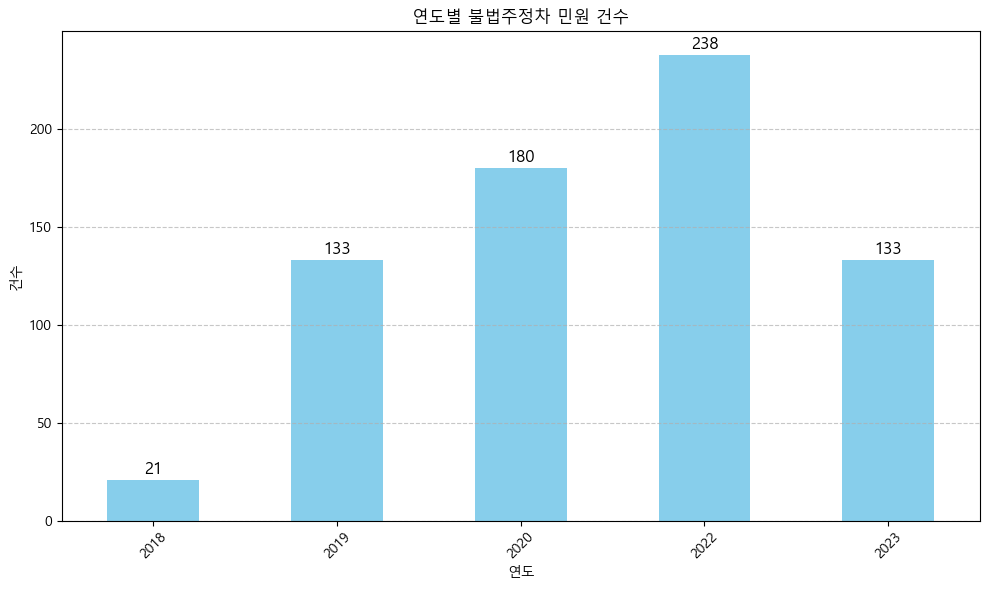

시각화 저장 위치: C:\Users\jisu\Documents\Ec\1\교통_주차\민원데이터상세\국민신문고 민원처리부\yearly_counts_plot.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 병합된 엑셀 파일 경로를 설정합니다.
merged_file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\민원데이터상세\국민신문고 민원처리부\merged_filtered_주차_천안_2012_2023.xlsx'

# 병합된 엑셀 파일을 읽어옵니다.
df_merged = pd.read_excel(merged_file_path)

# '접수일자' 열에서 연도를 추출하여 '연도' 열에 저장합니다.
df_merged['연도'] = pd.to_datetime(df_merged['접수일자'], errors='coerce').dt.year

# 2018년부터 이후 데이터만 필터링합니다.
df_filtered = df_merged[df_merged['연도'] >= 2018]

# 연도별 개수를 카운트합니다.
yearly_counts = df_filtered['연도'].value_counts().sort_index()

# 결과를 출력합니다.
print(yearly_counts)

# 한글 폰트 설정 (여기서는 'Malgun Gothic'을 예로 들었습니다)
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_path = [f for f in font_path if 'malgun' in f.lower()]
if font_path:
    plt.rcParams['font.family'] = fm.FontProperties(fname=font_path[0]).get_name()
else:
    print("Malgun Gothic 폰트를 찾을 수 없습니다. 기본 폰트로 대체합니다.")

# 연도별 개수를 시각화합니다.
plt.figure(figsize=(10, 6))
ax = yearly_counts.plot(kind='bar', color='skyblue')

# 막대 위에 숫자를 표시합니다.
for rect in ax.patches:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,  # x 위치
        height + 1,  # y 위치 (막대 위에 숫자를 약간 위에 배치)
        int(height),  # 텍스트
        ha='center',  # 텍스트 정렬
        va='bottom',  # 텍스트 수직 위치
        fontsize=12  # 텍스트 크기
    )

plt.title('연도별 불법주정차 민원 건수')
plt.xlabel('연도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 시각화 결과를 저장합니다.
plt_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\민원데이터상세\국민신문고 민원처리부\yearly_counts_plot.png'
plt.savefig(plt_path)
plt.show()

print(f"시각화 저장 위치: {plt_path}")

### 2. 천안시 연도 및 월별 단속 건수 시각화
사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv

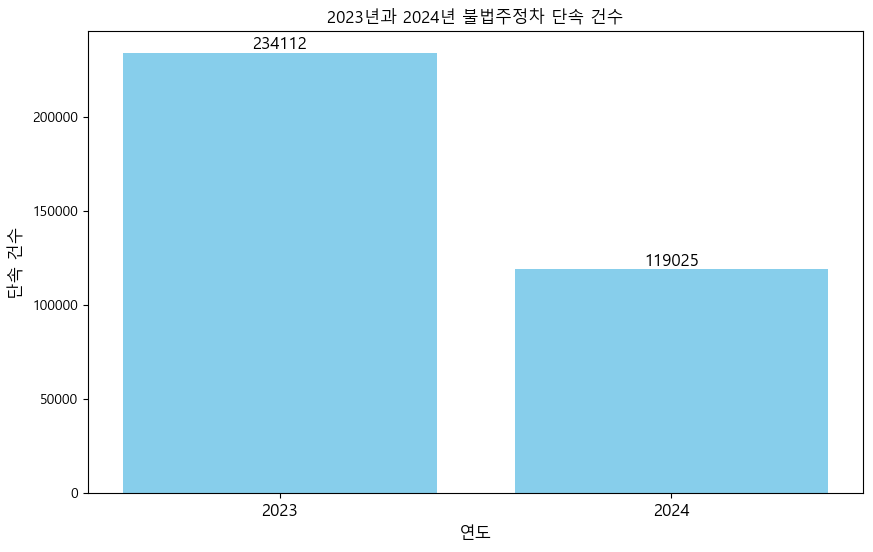

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path, encoding='utf-8')

# 단속일자 컬럼을 datetime 형식으로 변환
df['단속일자'] = pd.to_datetime(df['단속일자'])

# 단속일자의 연도만 추출
df['연도'] = df['단속일자'].dt.year

# 2023년과 2024년 데이터만 필터링
df_filtered = df[df['연도'].isin([2023, 2024])]

# 연도별 단속 건수 카운트
yearly_counts = df_filtered['연도'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.title('2023년과 2024년 불법주정차 단속 건수', fontproperties=fontprop)
plt.xlabel('연도', fontproperties=fontprop)
plt.ylabel('단속 건수', fontproperties=fontprop)

# 연도 축 설정 (2023, 2024만 표시)
plt.xticks([2023, 2024], fontproperties=fontprop)

# 막대 그래프 위에 개수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), 
             ha='center', va='bottom', fontproperties=fontprop)

plt.show()

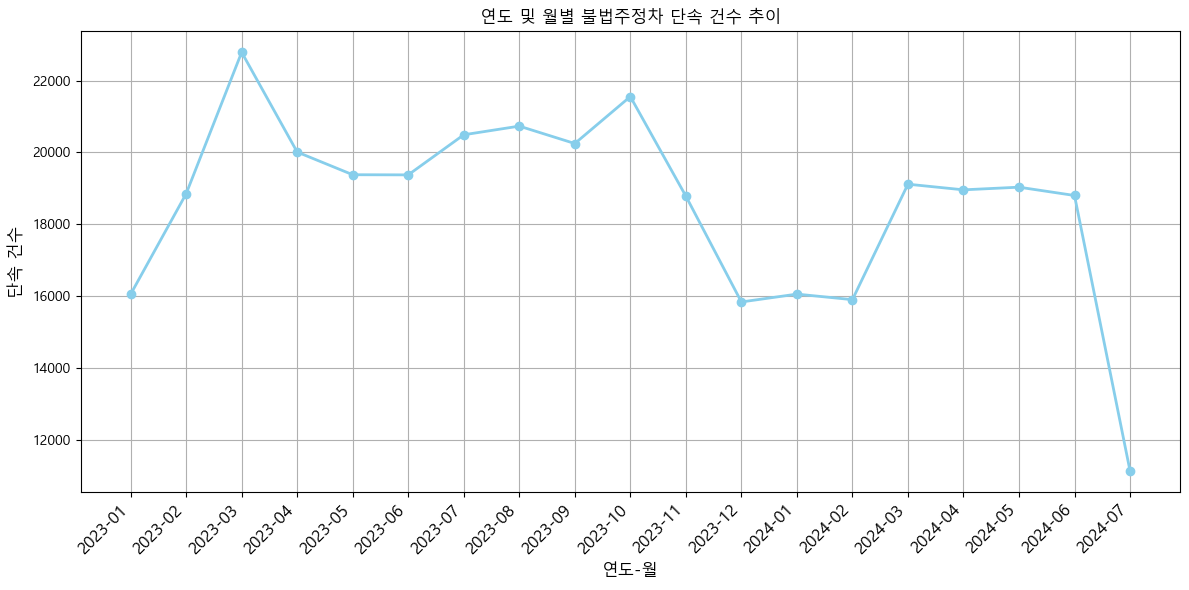

In [3]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 시스템에 설치된 한글 폰트 경로
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path, encoding='utf-8')

# 단속일자 컬럼을 datetime 형식으로 변환
df['단속일자'] = pd.to_datetime(df['단속일자'])

# 연도-월 추출
df['연도월'] = df['단속일자'].dt.to_period('M')

# 연도-월별 단속 건수 카운트
monthly_counts = df['연도월'].value_counts().sort_index()

# 시계열 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.title('연도 및 월별 불법주정차 단속 건수 추이', fontproperties=fontprop)
plt.xlabel('연도-월', fontproperties=fontprop)
plt.ylabel('단속 건수', fontproperties=fontprop)
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. 천안시 행정구역별 불법 주정차 단속 비율
사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv

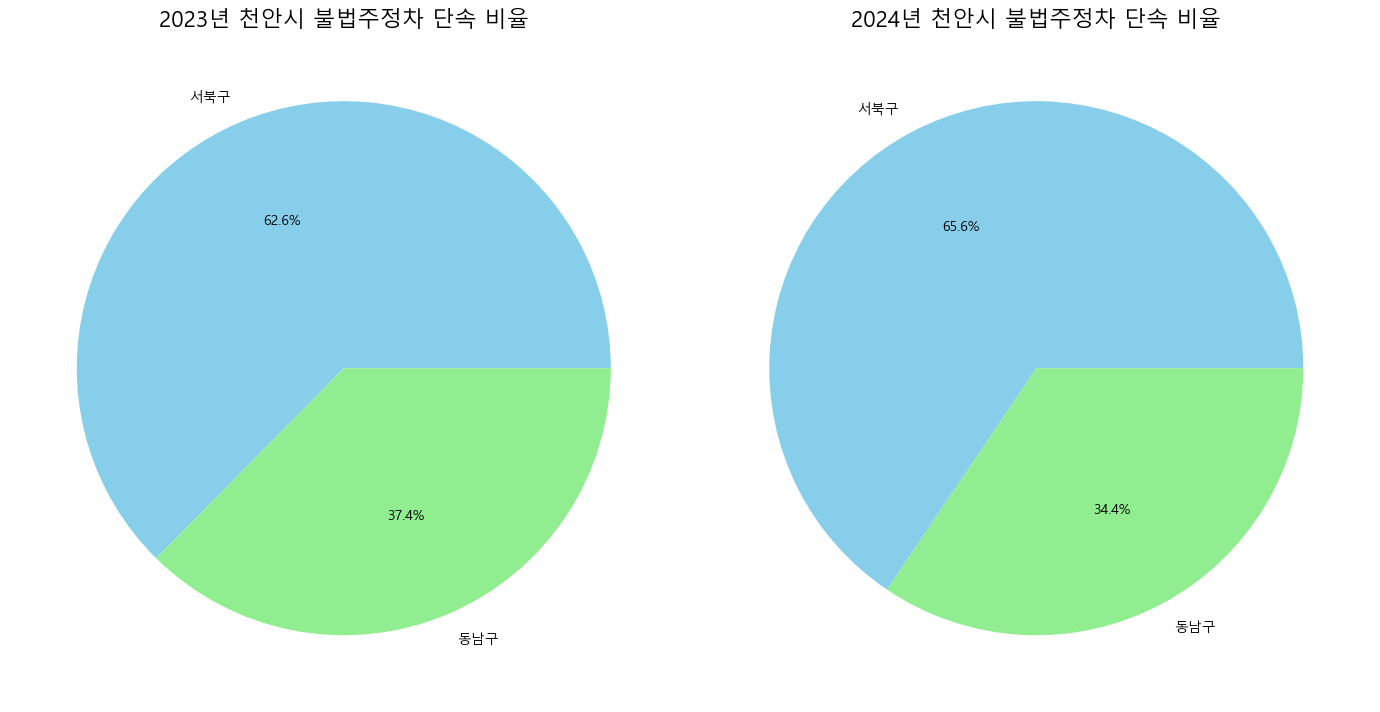

In [8]:
# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path, encoding='utf-8')

# 단속일자 컬럼을 datetime 형식으로 변환
df['단속일자'] = pd.to_datetime(df['단속일자'])

# 동남구와 서북구 단속동 리스트
dongnam_gu = [
    '대흥동', '성황동', '문화동', '사직동', '영성동', '오룡동', '원성동', '구성동',
    '청수동', '삼룡동', '청당동', '유량동', '봉명동', '다가동', '용곡동', '신방동',
    '쌍용동', '신부동', '안서동', '구룡동', '목천읍', '풍세면', '광덕면', '북면',
    '성남면', '수신면', '병천면', '동면', '중앙동', '문성동', '원성1동', '원성2동',
    '일봉동', '청룡동', '신안동'
]

seobuk_gu = [
    '와촌동', '성정동', '백석동', '두정동', '성성동', '차암동', '쌍용동', '불당동',
    '업성동', '신당동', '부대동', '성환읍', '성거읍', '직산읍', '입장면', '성정1동',
    '성정2동', '쌍용1동', '쌍용2동', '쌍용3동', '불당1동', '불당2동', '부성1동', '부성2동'
]

# 단속동을 동남구, 서북구로 분류
def classify_district(dong):
    if dong in dongnam_gu:
        return '동남구'
    elif dong in seobuk_gu:
        return '서북구'
    else:
        return None  # 기타는 제외

df['구역'] = df['단속동'].apply(classify_district)

# '기타' 구역 제외
df_filtered = df[df['구역'].notna()]

# 연도별로 데이터 필터링
df_2023 = df_filtered[df_filtered['단속일자'].dt.year == 2023]
df_2024 = df_filtered[df_filtered['단속일자'].dt.year == 2024]

# 연도별 단속 건수 집계
counts_2023 = df_2023['구역'].value_counts()
counts_2024 = df_2024['구역'].value_counts()

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# 2023년 파이 차트
axs[0].pie(counts_2023, labels=counts_2023.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
axs[0].set_title('2023년 천안시 불법주정차 단속 비율', fontsize=16)

# 2024년 파이 차트
axs[1].pie(counts_2024, labels=counts_2024.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
axs[1].set_title('2024년 천안시 불법주정차 단속 비율', fontsize=16)

plt.tight_layout()
plt.show()

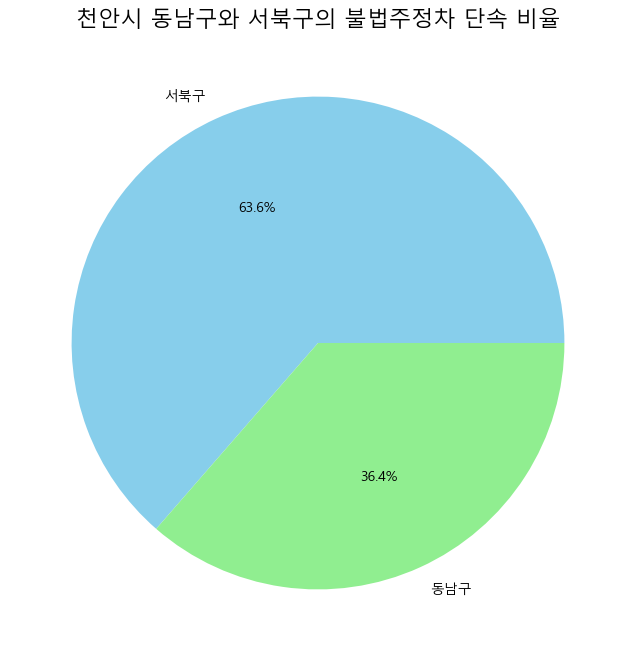

In [11]:
# 연도별 단속 건수 집계 후 합계 계산 (2023년과 2024년 데이터 합산)
district_counts = counts_2023 + counts_2024

# 전체 단속 건수 파이 차트 시각화
plt.figure(figsize=(8, 8))
district_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('천안시 동남구와 서북구의 불법주정차 단속 비율', fontsize=16)
plt.ylabel('')  # y축 레이블 제거
plt.show()

### 4. 천안시 시간대별 불법 주정차 발생 빈도
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv

파일을 성공적으로 읽었습니다. 사용된 인코딩: utf-8


C:\Users\jisu\AppData\Local\Temp\ipykernel_11332\2637375693.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_group.index, y=time_group.values, palette='viridis')


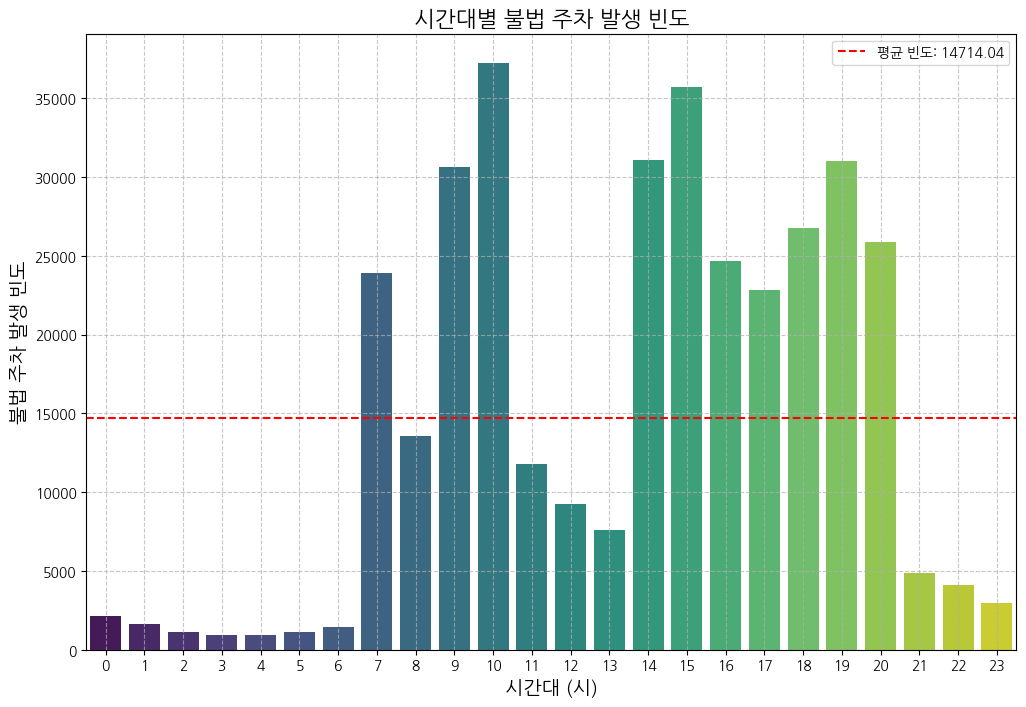

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 환경에서는 'NanumGothic'을 설치해야 합니다)
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/충청남도 천안시_불법주정차단속현황_20240715.csv'

# 인코딩을 여러 방식으로 시도해 데이터 로드
encoding_list = ['utf-8', 'cp949', 'euc-kr']

for enc in encoding_list:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f"파일을 성공적으로 읽었습니다. 사용된 인코딩: {enc}")
        break
    except UnicodeDecodeError:
        print(f"인코딩 {enc} 실패. 다음 인코딩 시도 중...")
else:
    raise ValueError("적합한 인코딩을 찾을 수 없습니다.")

# 단속 시간대 데이터를 추출하여 시간대별로 그룹화
df['단속시간'] = pd.to_datetime(df['단속시간'], format='%H:%M').dt.hour  # 시간대만 추출

# 시간대별 불법 주차 발생 빈도 계산
time_group = df.groupby('단속시간').size()

# 빈도의 평균 계산
mean_frequency = time_group.mean()

# 시간대별 불법 주차 발생 빈도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=time_group.index, y=time_group.values, palette='viridis')
plt.axhline(y=mean_frequency, color='red', linestyle='--', label=f'평균 빈도: {mean_frequency:.2f}')
plt.title('시간대별 불법 주차 발생 빈도', fontsize=16)
plt.xlabel('시간대 (시)', fontsize=14)
plt.ylabel('불법 주차 발생 빈도', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(24))
plt.legend()
plt.show()


### 5. 천안시 행정구역별 불법 주정차 단속 건수 및 주차장 개수와 주차구획수 비교
- 사용 데이터: 전국주차장정보표준데이터.csv (천안시 데이터만 추출해서 사용. 파일명: 천안시_주차장정보.csv), 충청남도 천안시_불법주정차단속현황_20240715.csv

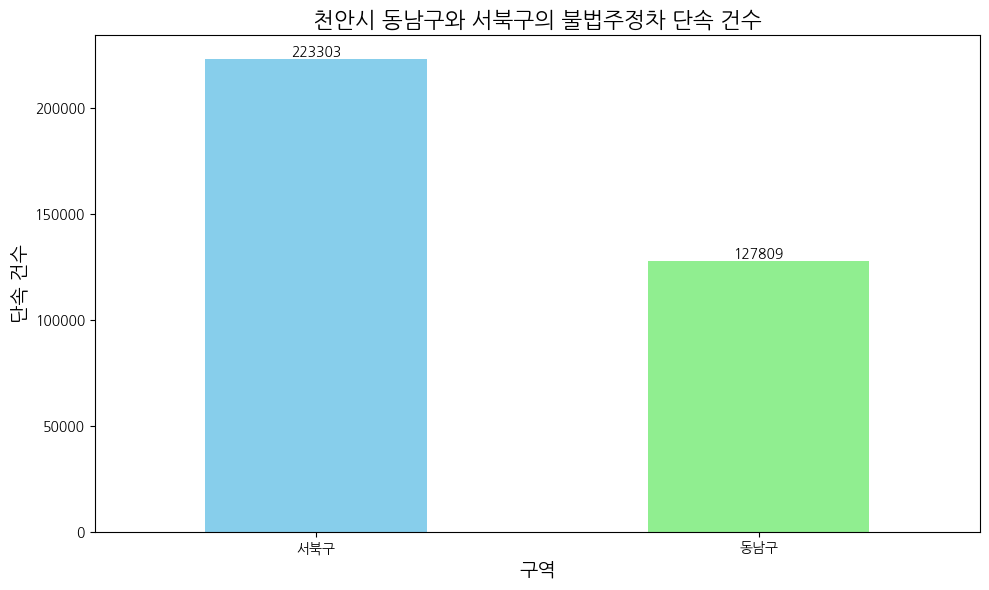

In [13]:
# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path, encoding='utf-8')

# 단속일자 컬럼을 datetime 형식으로 변환
df['단속일자'] = pd.to_datetime(df['단속일자'])

# 동남구와 서북구 단속동 리스트
dongnam_gu = [
    '대흥동', '성황동', '문화동', '사직동', '영성동', '오룡동', '원성동', '구성동',
    '청수동', '삼룡동', '청당동', '유량동', '봉명동', '다가동', '용곡동', '신방동',
    '쌍용동', '신부동', '안서동', '구룡동', '목천읍', '풍세면', '광덕면', '북면',
    '성남면', '수신면', '병천면', '동면', '중앙동', '문성동', '원성1동', '원성2동',
    '일봉동', '청룡동', '신안동'
]

seobuk_gu = [
    '와촌동', '성정동', '백석동', '두정동', '성성동', '차암동', '쌍용동', '불당동',
    '업성동', '신당동', '부대동', '성환읍', '성거읍', '직산읍', '입장면', '성정1동',
    '성정2동', '쌍용1동', '쌍용2동', '쌍용3동', '불당1동', '불당2동', '부성1동', '부성2동'
]

# 단속동을 동남구, 서북구로 분류
def classify_district(dong):
    if dong in dongnam_gu:
        return '동남구'
    elif dong in seobuk_gu:
        return '서북구'
    else:
        return None  # 기타는 제외

df['구역'] = df['단속동'].apply(classify_district)

# '기타' 구역 제외
df_filtered = df[df['구역'].notna()]

# 각 구역별 단속 건수 집계
district_counts = df_filtered['구역'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
ax = district_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

# 막대 위에 개수 표시
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.title('천안시 동남구와 서북구의 불법주정차 단속 건수', fontsize=16)
plt.xlabel('구역', fontsize=14)
plt.ylabel('단속 건수', fontsize=14)
plt.xticks(rotation=0)  # x축 레이블을 수평으로 표시
plt.tight_layout()
plt.show()

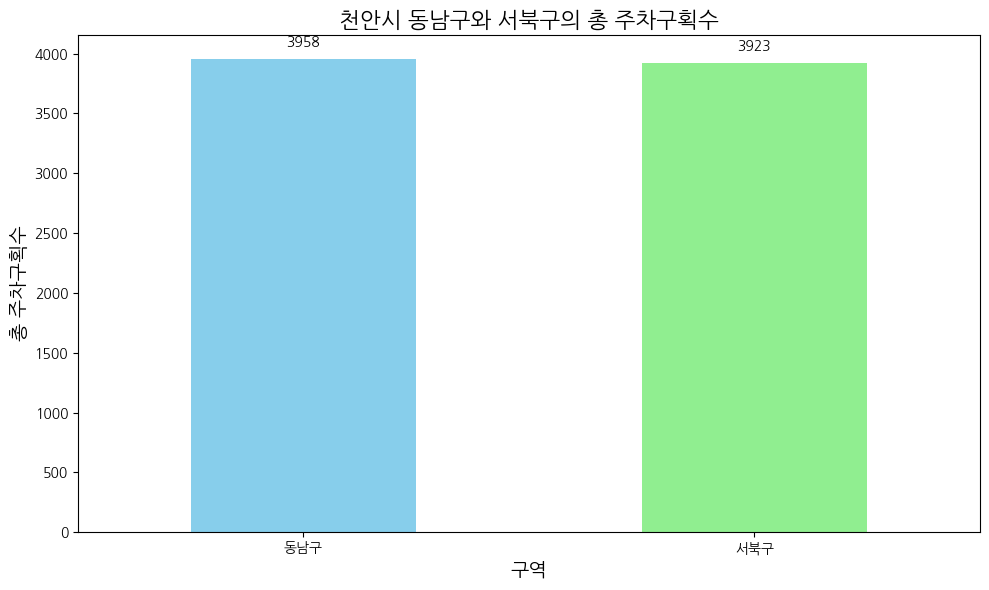

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\천안시_주차장정보.csv'

# CSV 파일 불러오기 (인코딩을 'euc-kr'로 설정)
df = pd.read_csv(file_path, encoding='euc-kr')

# 동남구와 서북구 키워드 리스트 정의
dongnam_gu_keywords = [
    '대흥동', '성황동', '문화동', '사직동', '영성동', '오룡동', '원성동', '구성동',
    '청수동', '삼룡동', '청당동', '유량동', '봉명동', '다가동', '용곡동', '신방동',
    '쌍용동', '신부동', '안서동', '구룡동', '목천읍', '풍세면', '광덕면', '북면',
    '성남면', '수신면', '병천면', '동면', '중앙동', '문성동', '원성1동', '원성2동',
    '일봉동', '청룡동', '신안동'
]

seobuk_gu_keywords = [
    '와촌동', '성정동', '백석동', '두정동', '성성동', '차암동', '쌍용동', '불당동',
    '업성동', '신당동', '부대동', '성환읍', '성거읍', '직산읍', '입장면', '성정1동',
    '성정2동', '쌍용1동', '쌍용2동', '쌍용3동', '불당1동', '불당2동', '부성1동', '부성2동'
]

# 소재지지번주소에 따라 동남구와 서북구로 분류
def classify_district(address):
    if any(keyword in address for keyword in dongnam_gu_keywords):
        return '동남구'
    elif any(keyword in address for keyword in seobuk_gu_keywords):
        return '서북구'
    else:
        return '기타'  # 기타는 제외

df['구역'] = df['소재지지번주소'].apply(classify_district)

# '기타' 구역 제외
df_filtered = df[df['구역'] != '기타']

# 각 구역별 주차구획수의 총합을 계산
district_parking_slot_counts = df_filtered.groupby('구역')['주차구획수'].sum()

# 시각화
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen']

# 막대 그래프 그리기
ax = district_parking_slot_counts.plot(kind='bar', color=colors)

# 그래프 제목 및 레이블 설정
plt.title('천안시 동남구와 서북구의 총 주차구획수', fontsize=16)
plt.xlabel('구역', fontsize=14)
plt.ylabel('총 주차구획수', fontsize=14)
plt.xticks(rotation=0)  # x축 레이블을 수평으로 표시

# 막대 그래프 위에 개수 표시
for i, value in enumerate(district_parking_slot_counts):
    # 숫자가 그래프 안에 잘 보이도록 위치 조정
    ax.text(i, value + (value * 0.02), str(value), ha='center', va='bottom', fontsize=10, color='black')

# 레이아웃 조정
plt.tight_layout()
plt.show()


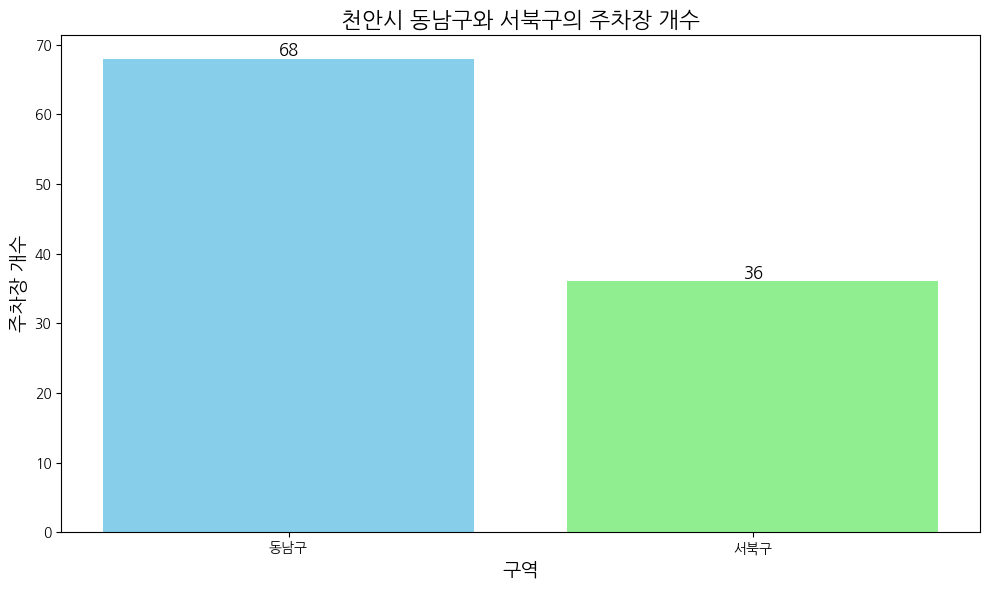

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\천안시_주차장정보.csv'

# CSV 파일 불러오기 (인코딩을 'euc-kr'로 설정)
df = pd.read_csv(file_path, encoding='euc-kr')

# 소재지지번주소에 따라 동남구와 서북구로 분류
def classify_district(address):
    if any(keyword in address for keyword in dongnam_gu_keywords):
        return '동남구'
    elif any(keyword in address for keyword in seobuk_gu_keywords):
        return '서북구'
    else:
        return '기타'  # 기타는 제외

df['구역'] = df['소재지지번주소'].apply(classify_district)

# '기타' 구역 제외
df_filtered = df[df['구역'] != '기타']

# 각 구역별 주차장 개수 집계
district_counts = df_filtered['구역'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen']
bars = plt.bar(district_counts.index, district_counts, color=colors)
plt.title('천안시 동남구와 서북구의 주차장 개수', fontsize=16)
plt.xlabel('구역', fontsize=14)
plt.ylabel('주차장 개수', fontsize=14)
plt.xticks(rotation=0)  # x축 레이블을 수평으로 표시

# 막대 그래프 위에 개수 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.002 * height,  # 위치 조정
             f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### 6. 천안시 법정동별 불법 주정차 단속 건수
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv

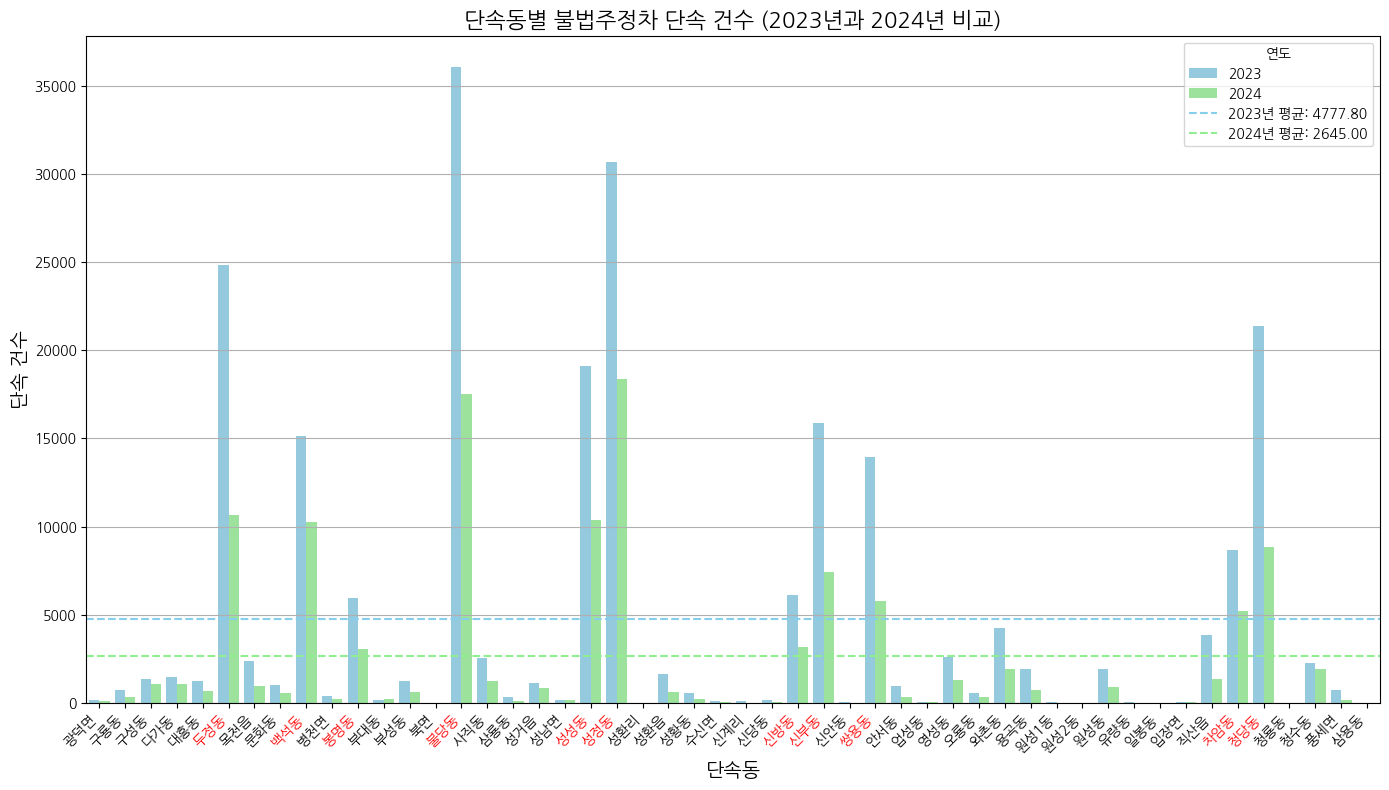

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path, encoding='utf-8')

# 단속일자 컬럼을 datetime 형식으로 변환
df['단속일자'] = pd.to_datetime(df['단속일자'])

# 연도와 단속동을 별도 컬럼으로 추출
df['연도'] = df['단속일자'].dt.year
df['단속동'] = df['단속동'].astype(str)  # 단속동을 문자열로 변환

# 연도별로 단속동별 단속 건수 카운트
df_counts = df.groupby(['연도', '단속동']).size().reset_index(name='단속 건수')

# 연도별 색상을 지정하기 위한 palette 설정
palette = {year: color for year, color in zip(sorted(df_counts['연도'].unique()), ['skyblue', 'lightgreen'])}

# 막대 그래프 시각화
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_counts, x='단속동', y='단속 건수', hue='연도', palette=palette)
plt.title('단속동별 불법주정차 단속 건수 (2023년과 2024년 비교)', fontsize=16)
plt.xlabel('단속동', fontsize=14)
plt.ylabel('단속 건수', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전

# 각 연도별 평균 단속 건수 계산 및 수평선 추가
for year in df_counts['연도'].unique():
    avg_count = df_counts[df_counts['연도'] == year]['단속 건수'].mean()
    plt.axhline(avg_count, color=palette[year], linestyle='--', label=f'{year}년 평균: {avg_count:.2f}')

# x축 라벨 스타일 적용
xtick_labels = ax.get_xticklabels()

for label in xtick_labels:
    label_text = label.get_text()
    
    # 각 단속동별 최대 단속 건수를 구하고, 평균과 비교
    for year in df_counts['연도'].unique():
        max_count = df_counts[(df_counts['연도'] == year) & (df_counts['단속동'] == label_text)]['단속 건수'].values
        avg_count = df_counts[df_counts['연도'] == year]['단속 건수'].mean()
        
        if len(max_count) > 0 and max_count[0] > avg_count:
            label.set_fontweight('bold')  # 글씨체를 볼드로 설정
            label.set_color('red')        # 글씨 색상을 빨간색으로 설정

plt.legend(title='연도')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


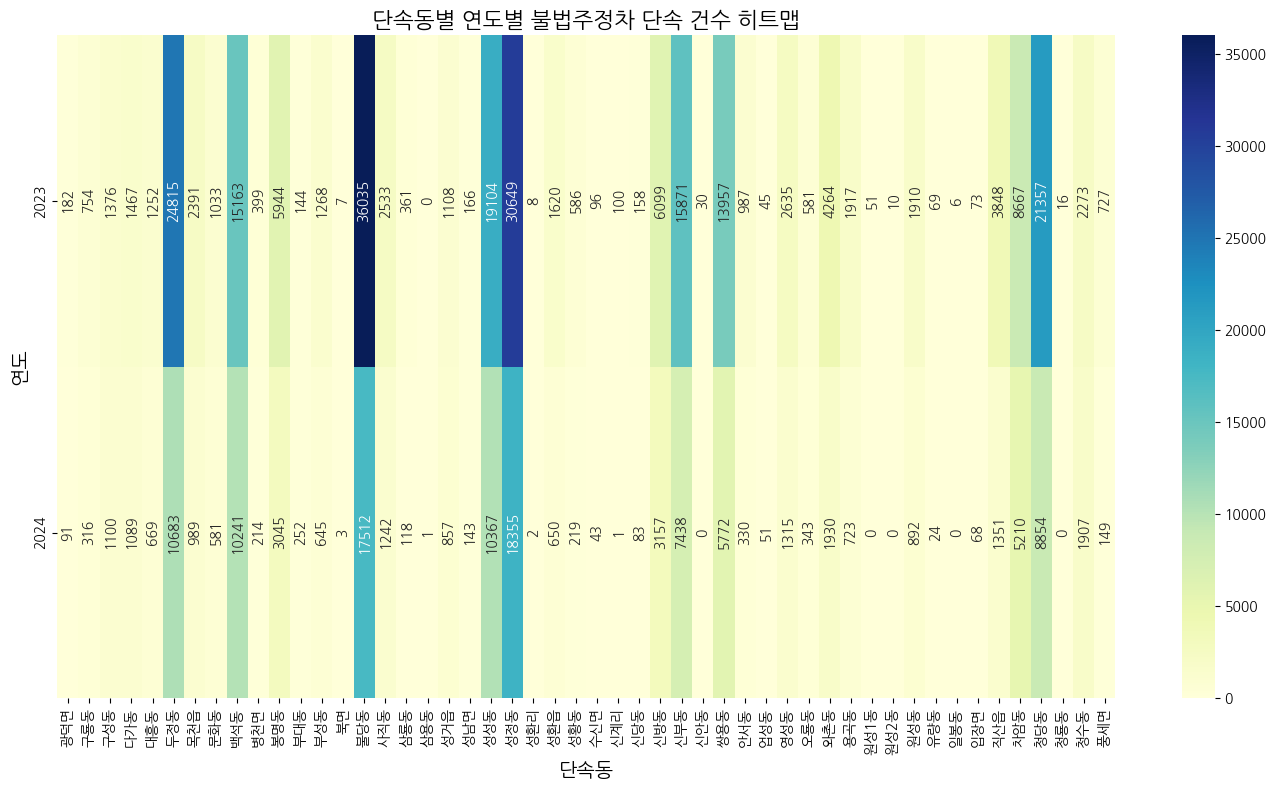

In [24]:
# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path, encoding='utf-8')

# 단속일자 컬럼을 datetime 형식으로 변환
df['단속일자'] = pd.to_datetime(df['단속일자'])

# 연도와 단속동을 별도 컬럼으로 추출
df['연도'] = df['단속일자'].dt.year
df['단속동'] = df['단속동'].astype(str)  # 단속동을 문자열로 변환

# 연도와 단속동별 단속 건수 카운트
df_counts = df.groupby(['연도', '단속동']).size().unstack(fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(14, 8))
ax = sns.heatmap(df_counts, annot=True, fmt='d', cmap='YlGnBu', annot_kws={'rotation': 90})
plt.title('단속동별 연도별 불법주정차 단속 건수 히트맵', fontsize=16)
plt.xlabel('단속동', fontsize=14)
plt.ylabel('연도', fontsize=14)
plt.tight_layout()
plt.show()

### 7. 천안시 동남구 법정동별 불법 주정차 단속 건수
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv

<Figure size 1400x800 with 0 Axes>

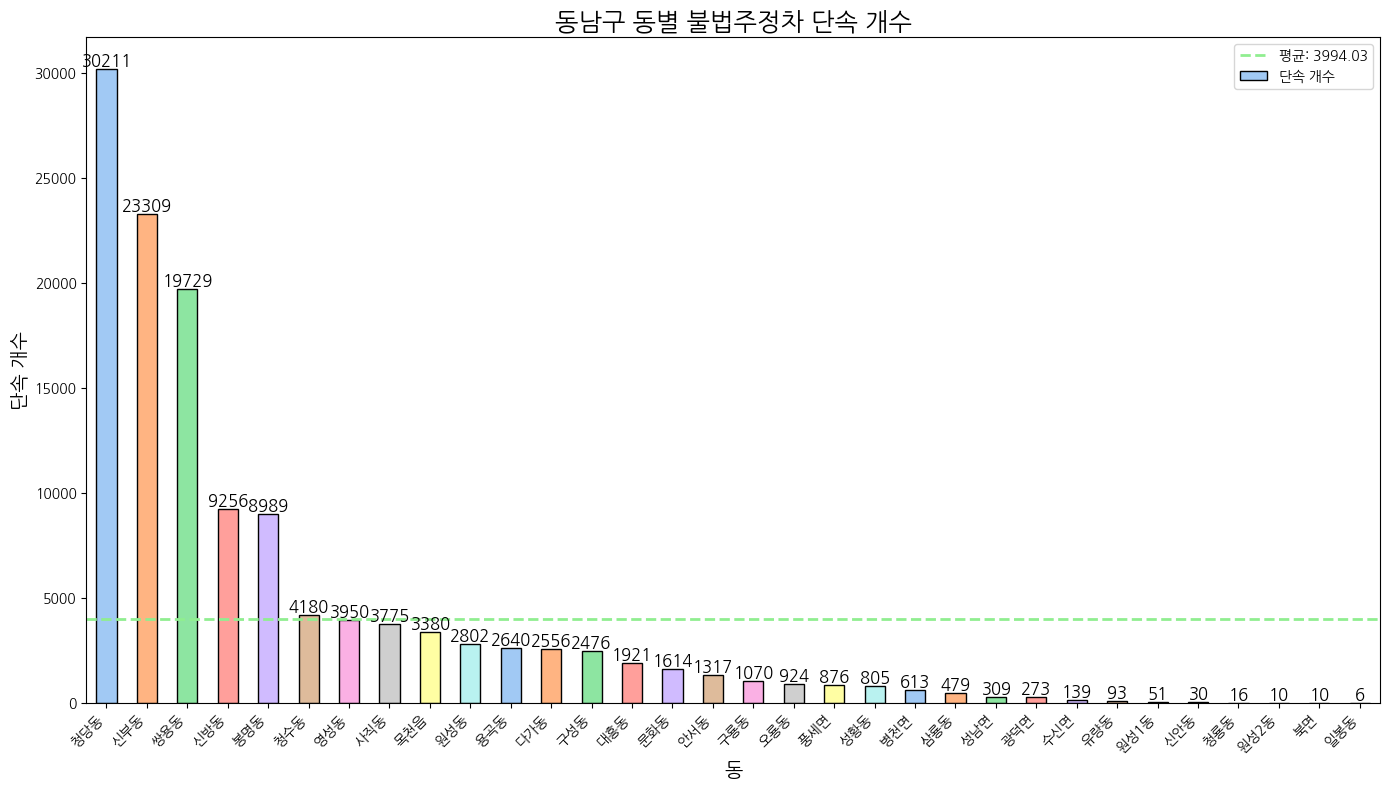

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# 동남구 동 리스트
dongnam_gu_dong = [
    '대흥동', '성황동', '문화동', '사직동', '영성동', '오룡동', '원성동', '구성동',
    '청수동', '삼룡동', '청당동', '유량동', '봉명동', '다가동', '용곡동', '신방동',
    '쌍용동', '신부동', '안서동', '구룡동', '목천읍', '풍세면', '광덕면', '북면',
    '성남면', '수신면', '병천면', '동면', '중앙동', '문성동', '원성1동', '원성2동',
    '일봉동', '청룡동', '신안동'
]

# 데이터 로드 (적절한 인코딩 사용)
def load_data(file_path):
    encodings = ['utf-8', 'euc-kr', 'cp949']
    for enc in encodings:
        try:
            return pd.read_csv(file_path, encoding=enc)
        except UnicodeDecodeError:
            continue
    raise ValueError("Unable to decode the file with known encodings.")

df = load_data(file_path)

# '단속동' 열을 동남구 동으로 필터링
df_dongnam = df[df['단속동'].isin(dongnam_gu_dong)]

# 동별로 단속 개수 카운트
dong_parking_counts_dongnam = df_dongnam['단속동'].value_counts().reset_index()
dong_parking_counts_dongnam.columns = ['동', '단속 개수']

# 시각화
plt.figure(figsize=(14, 8))

# 파스텔 톤 색상 팔레트 가져오기
pastel_colors = sns.color_palette("pastel", len(dong_parking_counts_dongnam))

# 막대 그래프 그리기
ax = dong_parking_counts_dongnam.plot(kind='bar', x='동', y='단속 개수', legend=False, color=pastel_colors, edgecolor='black', figsize=(14, 8))

# 그래프 제목 및 레이블 설정
plt.title('동남구 동별 불법주정차 단속 개수', fontsize=18)
plt.xlabel('동', fontsize=14)
plt.ylabel('단속 개수', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블을 기울여 표시

# 막대 그래프 위에 개수 표시
for i, count in enumerate(dong_parking_counts_dongnam['단속 개수']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12, color='black')

# 평균 단속 개수 계산
average_counts = dong_parking_counts_dongnam['단속 개수'].mean()

# 평균 단속 개수 선 추가
plt.axhline(average_counts, color='lightgreen', linestyle='--', linewidth=2, label=f'평균: {average_counts:.2f}')

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


       동  단속 개수
0    청당동  30211
1    신부동  23309
2    쌍용동  19729
3    신방동   9256
4    봉명동   8989
5    청수동   4180
6    영성동   3950
7    사직동   3775
8    목천읍   3380
9    원성동   2802
10   용곡동   2640
11   다가동   2556
12   구성동   2476
13   대흥동   1921
14   문화동   1614
15   안서동   1317
16   구룡동   1070
17   오룡동    924
18   풍세면    876
19   성황동    805
20   병천면    613
21   삼룡동    479
22   성남면    309
23   광덕면    273
24   수신면    139
25   유량동     93
26  원성1동     51
27   신안동     30
28   청룡동     16
29  원성2동     10
30    북면     10
31   일봉동      6


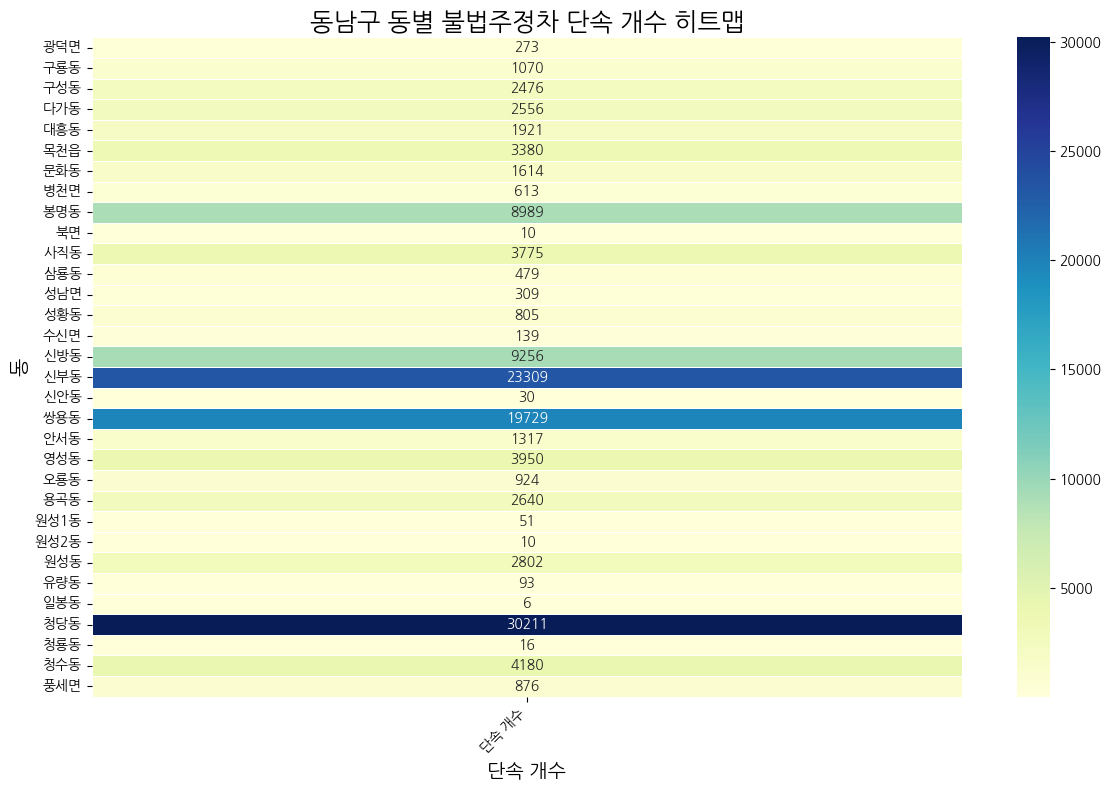

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# 동남구 동 리스트
dongnam_gu_dong = [
    '대흥동', '성황동', '문화동', '사직동', '영성동', '오룡동', '원성동', '구성동',
    '청수동', '삼룡동', '청당동', '유량동', '봉명동', '다가동', '용곡동', '신방동',
    '쌍용동', '신부동', '안서동', '구룡동', '목천읍', '풍세면', '광덕면', '북면',
    '성남면', '수신면', '병천면', '동면', '중앙동', '문성동', '원성1동', '원성2동',
    '일봉동', '청룡동', '신안동'
]

# 데이터 로드 (적절한 인코딩 사용)
def load_data(file_path):
    encodings = ['utf-8', 'euc-kr', 'cp949']
    for enc in encodings:
        try:
            return pd.read_csv(file_path, encoding=enc)
        except UnicodeDecodeError:
            continue
    raise ValueError("Unable to decode the file with known encodings.")

df = load_data(file_path)

# '단속동' 열을 동남구 동으로 필터링
df_dongnam = df[df['단속동'].isin(dongnam_gu_dong)]

# 동별로 단속 개수 카운트
dong_parking_counts_dongnam = df_dongnam['단속동'].value_counts().reset_index()
dong_parking_counts_dongnam.columns = ['동', '단속 개수']

# 데이터 확인
print(dong_parking_counts_dongnam)

# 데이터프레임을 피벗 테이블 형태로 변환
# 단속 개수만의 카운트를 표시하기 위한 데이터 준비
heatmap_data_dongnam = dong_parking_counts_dongnam.pivot_table(index='동', values='단속 개수', fill_value=0)

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_dongnam, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5, cbar=True)

# 그래프 제목 및 레이블 설정
plt.title('동남구 동별 불법주정차 단속 개수 히트맵', fontsize=18)
plt.xlabel('단속 개수', fontsize=14)
plt.ylabel('동', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블을 기울여 표시

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 8. 천안시 동남구 법정동별 주차장 및 주차구획수
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv

C:\Users\jisu\AppData\Local\Temp\ipykernel_11332\3609390291.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dongnam['동'] = df_dongnam['소재지지번주소'].apply(lambda x: next((dong for dong in dongnam_gu_dong if dong in x), '기타'))


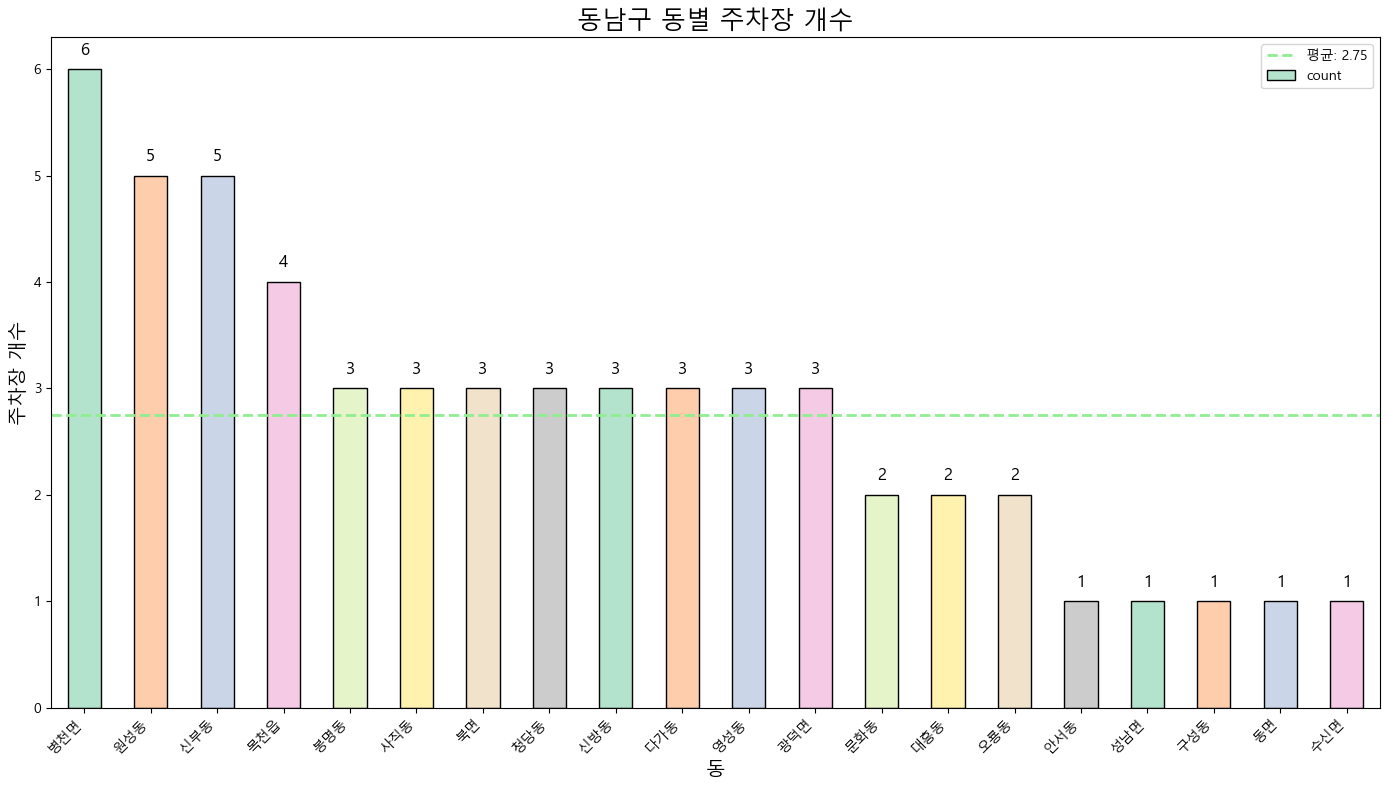

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\천안시_주차장정보.csv'

# CSV 파일 불러오기 (인코딩을 'euc-kr'로 설정)
df = pd.read_csv(file_path, encoding='euc-kr')

# 동남구 동 리스트
dongnam_gu_dong = [
    '대흥동', '성황동', '문화동', '사직동', '영성동', '오룡동', '원성동', '구성동',
    '청수동', '삼룡동', '청당동', '유량동', '봉명동', '다가동', '용곡동', '신방동',
    '쌍용동', '신부동', '안서동', '구룡동', '목천읍', '풍세면', '광덕면', '북면',
    '성남면', '수신면', '병천면', '동면', '중앙동', '문성동', '원성1동', '원성2동',
    '일봉동', '청룡동', '신안동'
]

# '동남구'가 들어가는 주소만 필터링
df_dongnam = df[df['소재지지번주소'].str.contains('동남구', na=False)]

# 동별로 주차장 개수를 카운트
df_dongnam['동'] = df_dongnam['소재지지번주소'].apply(lambda x: next((dong for dong in dongnam_gu_dong if dong in x), '기타'))

# '기타' 제외
df_dongnam_filtered = df_dongnam[df_dongnam['동'] != '기타']

# 동별 주차장 개수 집계
dong_parking_counts = df_dongnam_filtered['동'].value_counts()

# 시각화
plt.figure(figsize=(14, 8))

# 막대 그래프 그리기
colors = plt.get_cmap('Pastel2').colors  # 색상 팔레트
ax = dong_parking_counts.plot(kind='bar', color=colors[:len(dong_parking_counts)], edgecolor='black')

# 그래프 제목 및 레이블 설정
plt.title('동남구 동별 주차장 개수', fontsize=18)
plt.xlabel('동', fontsize=14)
plt.ylabel('주차장 개수', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블을 기울여 표시

# 막대 그래프 위에 개수 표시
for i, count in enumerate(dong_parking_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

# 평균 주차장 개수 계산
average_count = dong_parking_counts.mean()

# 평균 주차장 개수 선 추가
plt.axhline(average_count, color='lightgreen', linestyle='--', linewidth=2, label=f'평균: {average_count:.2f}')

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


C:\Users\jisu\AppData\Local\Temp\ipykernel_11332\3176887047.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dongnam['동'] = df_dongnam['소재지지번주소'].apply(lambda x: next((dong for dong in dongnam_gu_dong if dong in x), '기타'))


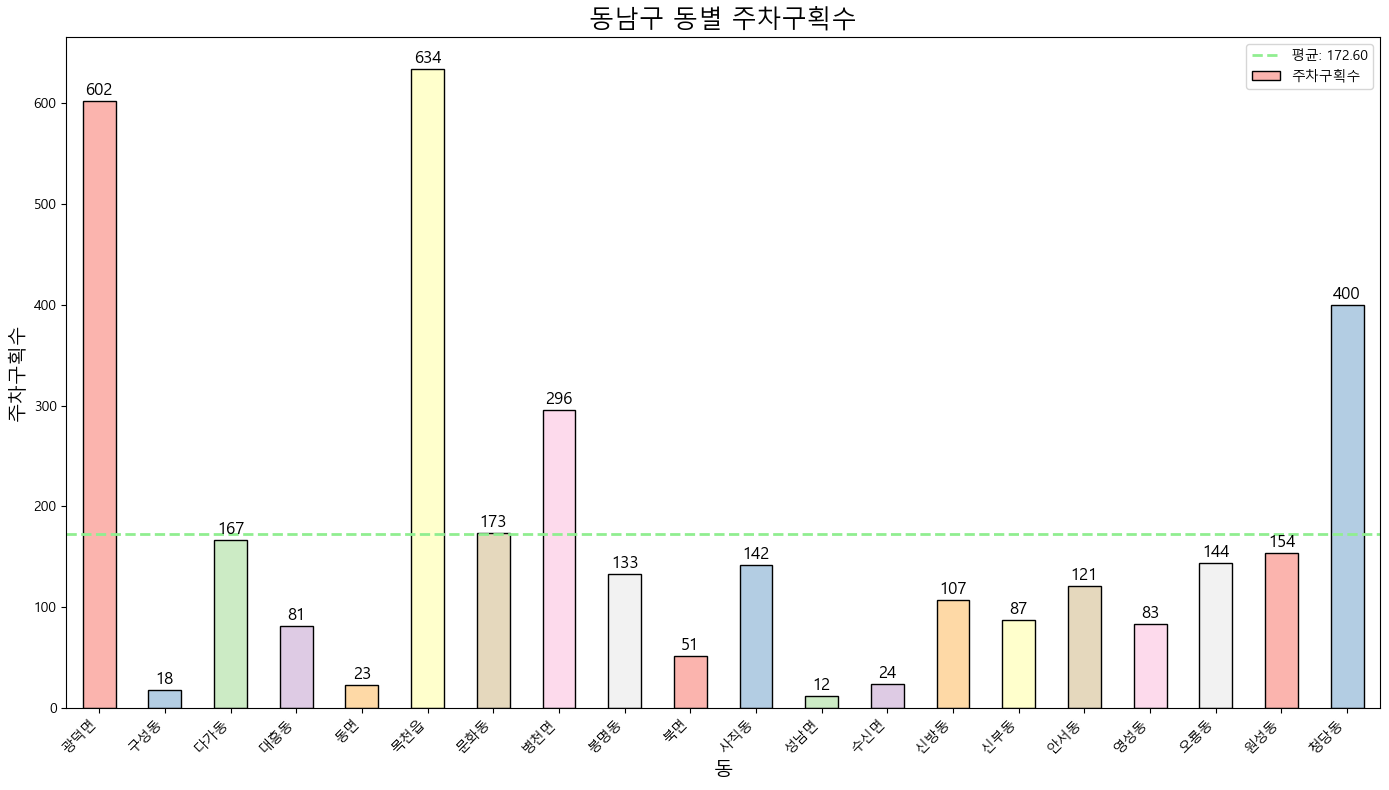

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\천안시_주차장정보.csv'

# CSV 파일 불러오기 (인코딩을 'euc-kr'로 설정)
df = pd.read_csv(file_path, encoding='euc-kr')

# 동남구 동 리스트
dongnam_gu_dong = [
    '대흥동', '성황동', '문화동', '사직동', '영성동', '오룡동', '원성동', '구성동',
    '청수동', '삼룡동', '청당동', '유량동', '봉명동', '다가동', '용곡동', '신방동',
    '쌍용동', '신부동', '안서동', '구룡동', '목천읍', '풍세면', '광덕면', '북면',
    '성남면', '수신면', '병천면', '동면', '중앙동', '문성동', '원성1동', '원성2동',
    '일봉동', '청룡동', '신안동'
]

# 동남구 동별로 주차구획수의 합계 계산
df_dongnam = df[df['소재지지번주소'].str.contains('동남구', na=False)]
df_dongnam['동'] = df_dongnam['소재지지번주소'].apply(lambda x: next((dong for dong in dongnam_gu_dong if dong in x), '기타'))

# '기타' 제외
df_dongnam_filtered = df_dongnam[df_dongnam['동'] != '기타']

# 동별 주차구획수 집계
dong_parking_slots_dongnam = df_dongnam_filtered.groupby('동')['주차구획수'].sum().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(14, 8))
colors = plt.get_cmap('Pastel1').colors  # 색상 팔레트
ax = dong_parking_slots_dongnam.plot(kind='bar', color=colors[:len(dong_parking_slots_dongnam)], edgecolor='black')

# 그래프 제목 및 레이블 설정
plt.title('동남구 동별 주차구획수', fontsize=18)
plt.xlabel('동', fontsize=14)
plt.ylabel('주차구획수', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블을 기울여 표시

# 막대 그래프 위에 개수 표시
for i, value in enumerate(dong_parking_slots_dongnam):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=12, color='black')

# 평균 주차구획수 계산
average_slots = dong_parking_slots_dongnam.mean()

# 평균 주차구획수 선 추가
plt.axhline(average_slots, color='lightgreen', linestyle='--', linewidth=2, label=f'평균: {average_slots:.2f}')

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 9. 천안시 서북구 법정동별 불법주정차 단속 건수
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv

      동  단속 개수
0   불당동  53547
1   성정동  49004
2   두정동  35498
3   성성동  29471
4   백석동  25404
5   쌍용동  19729
6   차암동  13877
7   와촌동   6194
8   직산읍   5199
9   성환읍   2270
10  성거읍   1965
11  부대동    396
12  신당동    241
13  입장면    141
14  업성동     96


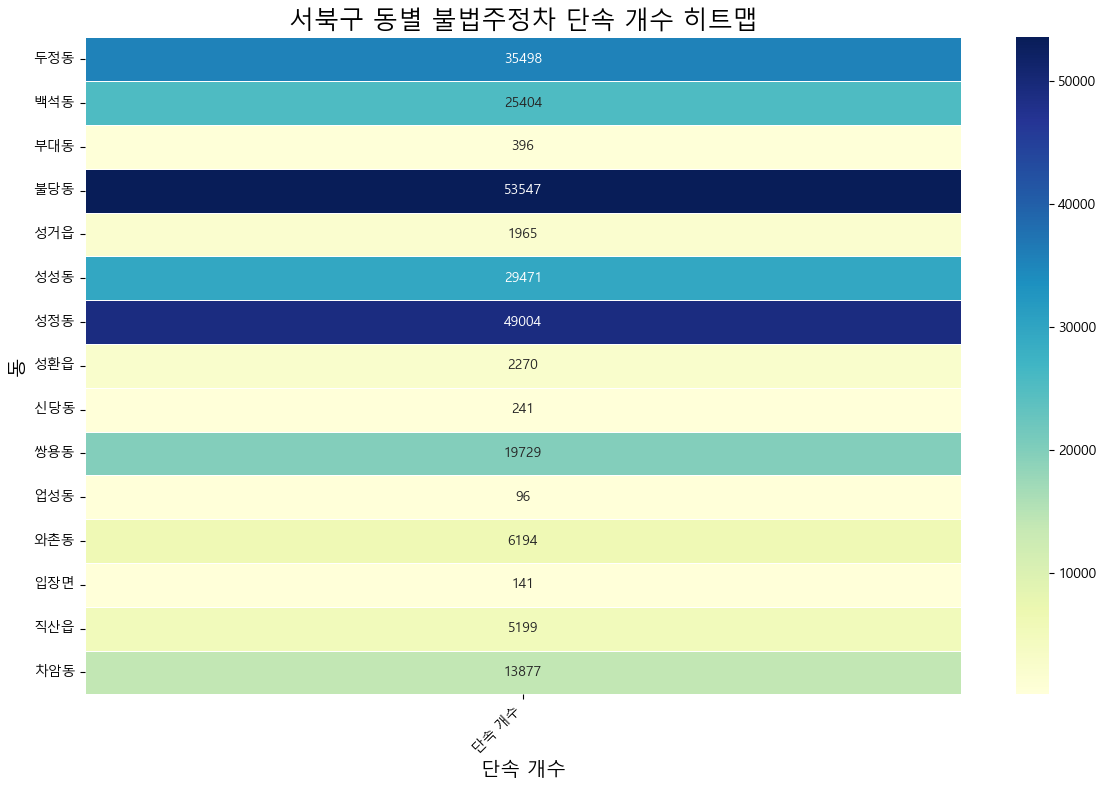

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# 서북구 동 리스트
seobuk_gu_dong = [
    '와촌동', '성정동', '백석동', '두정동', '성성동', '차암동', '쌍용동', '불당동',
    '업성동', '신당동', '부대동', '성환읍', '성거읍', '직산읍', '입장면', '성정1동',
    '성정2동', '쌍용1동', '쌍용2동', '쌍용3동', '불당1동', '불당2동', '부성1동', '부성2동'
]

# 데이터 로드 (적절한 인코딩 사용)
def load_data(file_path):
    encodings = ['utf-8', 'euc-kr', 'cp949']
    for enc in encodings:
        try:
            return pd.read_csv(file_path, encoding=enc)
        except UnicodeDecodeError:
            continue
    raise ValueError("Unable to decode the file with known encodings.")

df = load_data(file_path)

# '단속동' 열을 서북구 동으로 필터링
df_seobuk = df[df['단속동'].isin(seobuk_gu_dong)]

# 동별로 단속 개수 카운트
dong_parking_counts = df_seobuk['단속동'].value_counts().reset_index()
dong_parking_counts.columns = ['동', '단속 개수']

# 데이터 확인
print(dong_parking_counts)

# 데이터프레임을 피벗 테이블 형태로 변환
# 단속 개수만의 카운트를 표시하기 위한 데이터 준비
heatmap_data = dong_parking_counts.pivot_table(index='동', values='단속 개수', fill_value=0)

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5, cbar=True)

# 그래프 제목 및 레이블 설정
plt.title('서북구 동별 불법주정차 단속 개수 히트맵', fontsize=18)
plt.xlabel('단속 개수', fontsize=14)
plt.ylabel('동', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블을 기울여 표시

# 레이아웃 조정
plt.tight_layout()
plt.show()


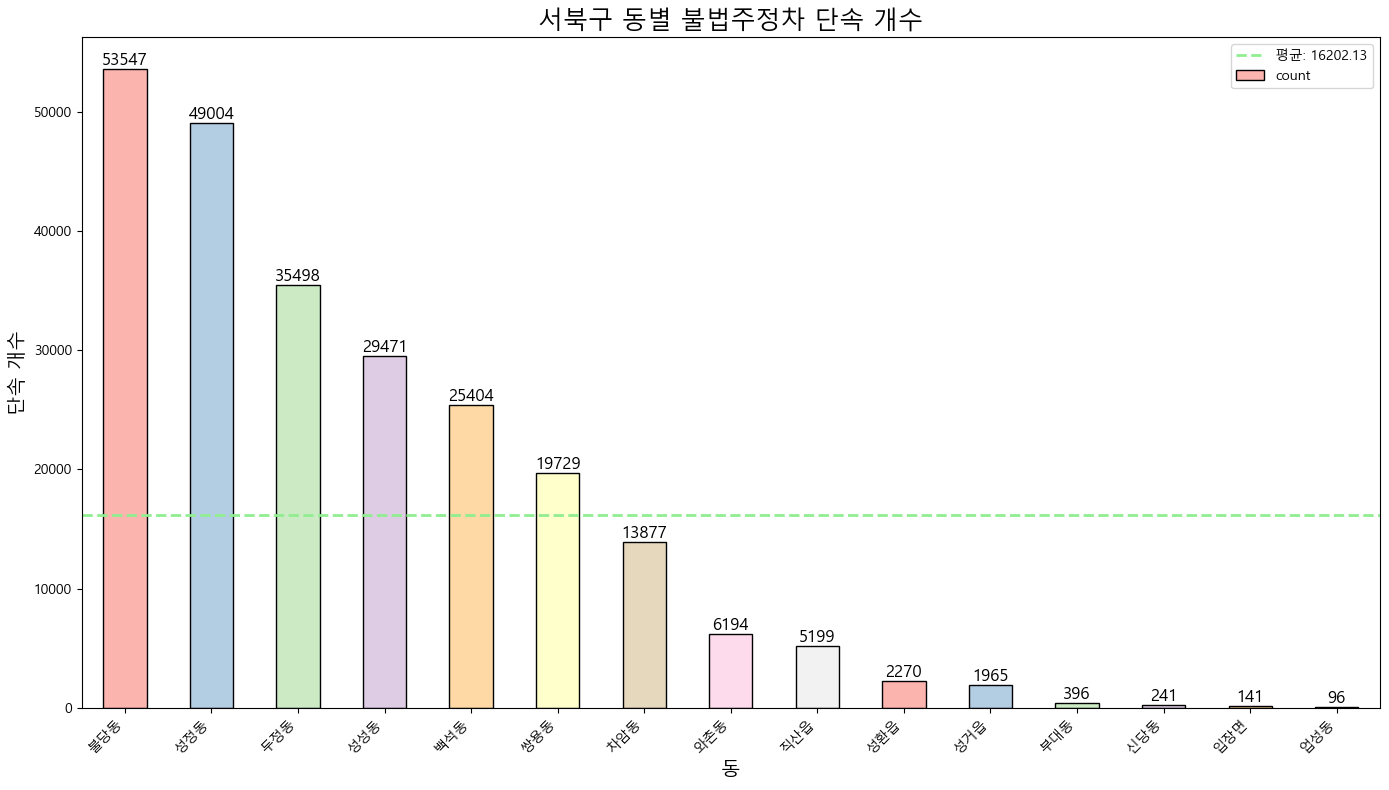

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\충청남도 천안시_불법주정차단속현황_20240715.csv'

# 서북구 동 리스트
seobuk_gu_dong = [
    '와촌동', '성정동', '백석동', '두정동', '성성동', '차암동', '쌍용동', '불당동',
    '업성동', '신당동', '부대동', '성환읍', '성거읍', '직산읍', '입장면', '성정1동',
    '성정2동', '쌍용1동', '쌍용2동', '쌍용3동', '불당1동', '불당2동', '부성1동', '부성2동'
]

# 데이터 로드 (적절한 인코딩 사용)
def load_data(file_path):
    encodings = ['utf-8', 'euc-kr', 'cp949']
    for enc in encodings:
        try:
            return pd.read_csv(file_path, encoding=enc)
        except UnicodeDecodeError:
            continue
    raise ValueError("Unable to decode the file with known encodings.")

df = load_data(file_path)

# '단속동' 열을 서북구 동으로 필터링
df_seobuk = df[df['단속동'].isin(seobuk_gu_dong)]

# 동별로 단속 개수 카운트
dong_parking_counts = df_seobuk['단속동'].value_counts()

# 시각화
plt.figure(figsize=(14, 8))

# 막대 그래프 그리기
colors = plt.get_cmap('Pastel1').colors  # 색상 팔레트
ax = dong_parking_counts.plot(kind='bar', color=colors[:len(dong_parking_counts)], edgecolor='black')

# 그래프 제목 및 레이블 설정
plt.title('서북구 동별 불법주정차 단속 개수', fontsize=18)
plt.xlabel('동', fontsize=14)
plt.ylabel('단속 개수', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블을 기울여 표시

# 막대 그래프 위에 개수 표시
for i, count in enumerate(dong_parking_counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=12, color='black')

# 평균 단속 개수 계산
average_counts = dong_parking_counts.mean()

# 평균 단속 개수 선 추가
plt.axhline(average_counts, color='lightgreen', linestyle='--', linewidth=2, label=f'평균: {average_counts:.2f}')

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 10. 천안시 서북구 법정동별 주차장 개수 및 주차구획수
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv

C:\Users\jisu\AppData\Local\Temp\ipykernel_11332\3973837155.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seobuk['동'] = df_seobuk['소재지지번주소'].apply(lambda x: next((dong for dong in seobuk_gu_dong if dong in x), '기타'))


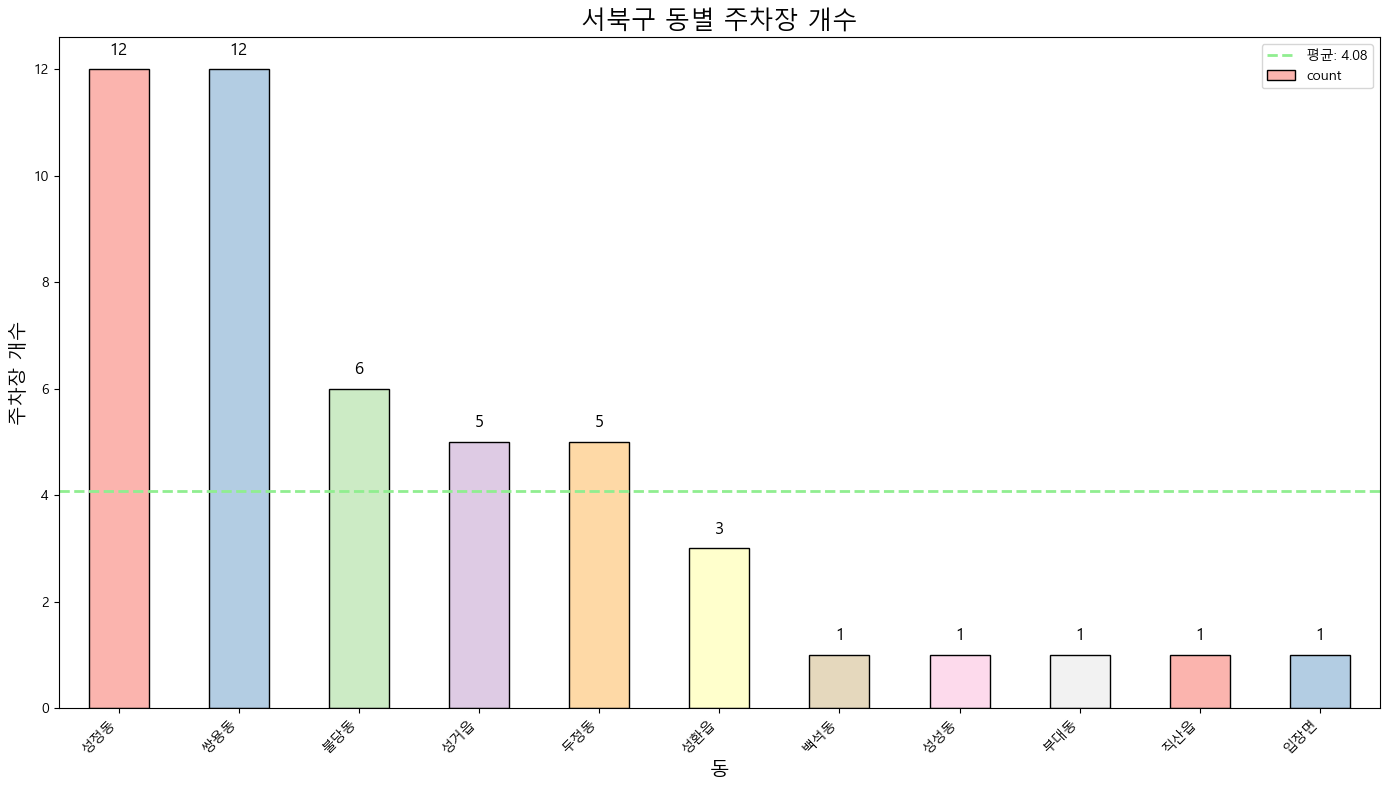

In [34]:
# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\천안시_주차장정보.csv'

# CSV 파일 불러오기 (인코딩을 'euc-kr'로 설정)
df = pd.read_csv(file_path, encoding='euc-kr')

# 서북구 동 리스트
seobuk_gu_dong = [
    '와촌동', '성정동', '백석동', '두정동', '성성동', '차암동', '쌍용동', '불당동',
    '업성동', '신당동', '부대동', '성환읍', '성거읍', '직산읍', '입장면', '성정1동',
    '성정2동', '쌍용1동', '쌍용2동', '쌍용3동', '불당1동', '불당2동', '부성1동', '부성2동'
]

# '서북구'가 들어가는 주소만 필터링
df_seobuk = df[df['소재지지번주소'].str.contains('서북구', na=False)]

# 동별로 주차장 개수를 카운트
df_seobuk['동'] = df_seobuk['소재지지번주소'].apply(lambda x: next((dong for dong in seobuk_gu_dong if dong in x), '기타'))

# 동별 주차장 개수 집계
s_parking_counts = df_seobuk['동'].value_counts()

# '기타' 제외
df_seobuk_filtered = df_seobuk[df_seobuk['동'] != '기타']

# 동별 주차장 개수 집계
dong_parking_counts = df_seobuk_filtered['동'].value_counts()

# 시각화
plt.figure(figsize=(14, 8))

# 막대 그래프 그리기
colors = plt.get_cmap('Pastel1').colors  # 색상 팔레트
ax = dong_parking_counts.plot(kind='bar', color=colors[:len(dong_parking_counts)], edgecolor='black')

# 그래프 제목 및 레이블 설정
plt.title('서북구 동별 주차장 개수', fontsize=18)
plt.xlabel('동', fontsize=14)
plt.ylabel('주차장 개수', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블을 기울여 표시

# 막대 그래프 위에 개수 표시
for i, count in enumerate(dong_parking_counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=12, color='black')
    
# 평균 주차장 개수 계산
average_count = s_parking_counts.mean()

# 평균 주차장 개수 선 추가
plt.axhline(average_count, color='lightgreen', linestyle='--', linewidth=2, label=f'평균: {average_count:.2f}')   

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

C:\Users\jisu\AppData\Local\Temp\ipykernel_11332\1366594915.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seobuk['동'] = df_seobuk['소재지지번주소'].apply(lambda x: next((dong for dong in seobuk_gu_dong if dong in x), '기타'))


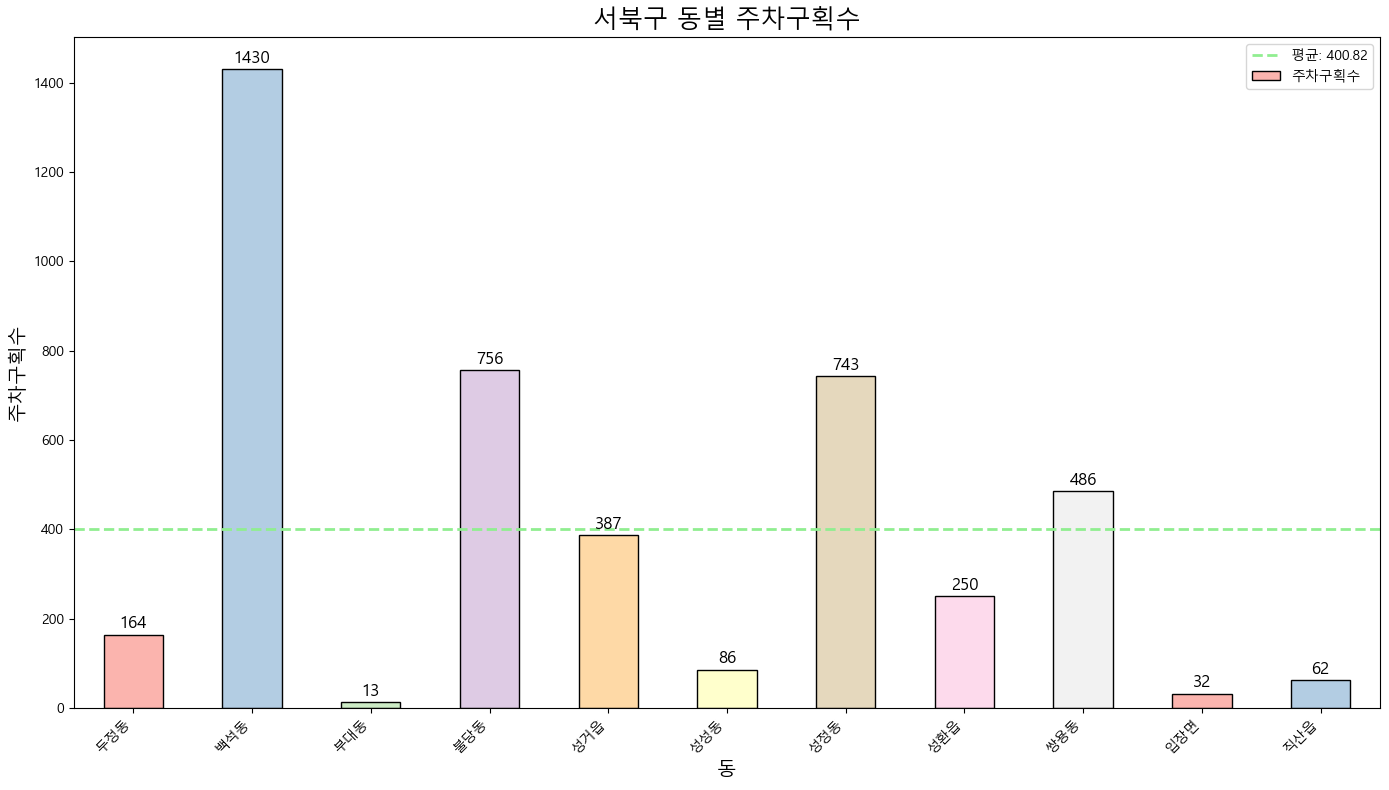

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로 설정
file_path = r'C:\Users\jisu\Documents\Ec\1\교통_주차\천안시_주차장정보.csv'

# CSV 파일 불러오기 (인코딩을 'euc-kr'로 설정)
df = pd.read_csv(file_path, encoding='euc-kr')

# 서북구 동 리스트
seobuk_gu_dong = [
    '와촌동', '성정동', '백석동', '두정동', '성성동', '차암동', '쌍용동', '불당동',
    '업성동', '신당동', '부대동', '성환읍', '성거읍', '직산읍', '입장면', '성정1동',
    '성정2동', '쌍용1동', '쌍용2동', '쌍용3동', '불당1동', '불당2동', '부성1동', '부성2동'
]

# '서북구'가 들어가는 주소만 필터링
df_seobuk = df[df['소재지지번주소'].str.contains('서북구', na=False)]

# 동별로 주차구획수의 합계 계산
df_seobuk['동'] = df_seobuk['소재지지번주소'].apply(lambda x: next((dong for dong in seobuk_gu_dong if dong in x), '기타'))

# '기타' 제외
df_seobuk_filtered = df_seobuk[df_seobuk['동'] != '기타']

# 동별 주차구획수 집계
dong_parking_slots = df_seobuk_filtered.groupby('동')['주차구획수'].sum().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(14, 8))
colors = plt.get_cmap('Pastel1').colors  # 색상 팔레트
ax = dong_parking_slots.plot(kind='bar', color=colors[:len(dong_parking_slots)], edgecolor='black')

# 그래프 제목 및 레이블 설정
plt.title('서북구 동별 주차구획수', fontsize=18)
plt.xlabel('동', fontsize=14)
plt.ylabel('주차구획수', fontsize=14)
plt.xticks(rotation=45, ha='right')  # x축 레이블을 기울여 표시

# 막대 그래프 위에 개수 표시
for i, value in enumerate(dong_parking_slots):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=12, color='black')

# 평균 주차구획수 계산
average_slots = dong_parking_slots.mean()

# 평균 주차구획수 선 추가
plt.axhline(average_slots, color='lightgreen', linestyle='--', linewidth=2, label=f'평균: {average_slots:.2f}')

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 11. 천안시 원성동 주차장 및 불법 주정차 단속 위치 분포 지도 및 열지도
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv(2024년 데이터만 사용, 위도 및 경도 직접 추가), 전국주차장정보표준데이터.csv(천안시만 추출한 데이터 사용. 파일명: 천안시_주차장정보.csv)

In [36]:
import folium
import pandas as pd

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.8091134, 'lon': 127.1581915, 'name': '버들로 제1노상주차장'},  
    {'lat': 36.81418927, 'lon': 127.162674, 'name': '성황로 제3노상주차장'},  
    {'lat': 36.81268831, 'lon': 127.1623341, 'name': '성황로 제2노상주차장'},  
    {'lat': 36.81187124, 'lon': 127.163016, 'name': '원성1동주민센터주차장'},  
    {'lat': 36.8091134, 'lon': 127.1535923, 'name': '중앙도서관주차장'}   
]

# 불법 주차 단속 데이터 로드
violations_df = pd.read_csv('C:/Users/jisu/Documents/Ec/1/교통_주차/원성동 불법 주차 단속.csv')

# 지도의 중심 좌표와 초기 확대 수준 설정
map_center = [36.804125, 127.1524667]  # 천안
map = folium.Map(location=map_center, zoom_start=14)

# 주차장 마커 추가
for lot in parking_lots:
    folium.Marker(
        location=[lot['lat'], lot['lon']],
        popup=lot['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# 불법 주차 단속 마커 추가
for idx, row in violations_df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup='단속장소',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map)

# 지도를 HTML 파일로 저장
map.save('map.html')

In [37]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.8091134, 'lon': 127.1581915, 'name': '버들로 제1노상주차장'},  
    {'lat': 36.81418927, 'lon': 127.162674, 'name': '성황로 제3노상주차장'},  
    {'lat': 36.81268831, 'lon': 127.1623341, 'name': '성황로 제2노상주차장'},  
    {'lat': 36.81187124, 'lon': 127.163016, 'name': '원성1동주민센터주차장'},  
    {'lat': 36.8091134, 'lon': 127.1535923, 'name': '중앙도서관주차장'}   
]

# 불법 주차 단속 데이터 로드
violations_df = pd.read_csv('C:/Users/jisu/Documents/Ec/1/교통_주차/원성동 불법 주차 단속.csv')

# 지도의 중심 좌표와 초기 확대 수준 설정
map_center = [36.804125, 127.1524667]  # 천안
map = folium.Map(location=map_center, zoom_start=14)

# 주차장 마커 추가
for lot in parking_lots:
    folium.Marker(
        location=[lot['lat'], lot['lon']],
        popup=lot['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# 열지도 데이터 생성 (불법 주차 단속 위치)
heat_data = [[row['위도'], row['경도']] for index, row in violations_df.iterrows()]

# 열지도 추가
HeatMap(heat_data).add_to(map)

# 지도를 HTML 파일로 저장
map.save('원성동 불법 주차 단속 및 주차장 위치_열지도.html')

### 12. 천안시 성거읍 주차장 및 불법 주정차 단속 위치 분포 지도 및 열지도
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv(2024년 데이터만 사용, 위도 및 경도 직접 추가), 전국주차장정보표준데이터.csv(천안시만 추출한 데이터 사용. 파일명: 천안시_주차장정보.csv)

##### 데이터 정제 (빈도가 아닌 분포를 알아보기 위해 중복된 단속 지역은 제거)

In [ ]:
import pandas as pd

# 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/충청남도 천안시_불법주정차단속현황_20240715.csv'
violations_df = pd.read_csv(file_path)

# '단속일자'에 '2024'가 포함되고 '단속동'에 '성환읍'이 포함된 데이터 필터링
filtered_df = violations_df[(violations_df['단속일자'].astype(str).str.contains('2024')) &
                            (violations_df['단속동'].str.contains('성거읍'))]

# 필터링된 데이터를 새로운 CSV 파일로 저장
output_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성거읍 불법 주차 단속.csv'
filtered_df.to_csv(output_path, index=False)

print("필터링된 데이터가 '성거읍 불법 주차 단속.csv' 파일로 저장되었습니다.")

In [ ]:
import pandas as pd

# CSV 파일 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성거읍 불법 주차 단속.csv'
violations_df = pd.read_csv(file_path)

# '단속장소' 컬럼의 값에서 공백 제거
violations_df['단속장소'] = violations_df['단속장소'].str.strip()

# '단속장소' 컬럼에서 중복된 값을 제거하고 첫 번째만 남기기
unique_violations_df = violations_df.drop_duplicates(subset=['단속장소'])

# 결과를 원래 파일에 덮어쓰기
unique_violations_df.to_csv(file_path, index=False)

print("중복된 단속장소가 공백과 함께 제거된 데이터가 저장되었습니다.")


##### 지도

In [38]:
import folium
import pandas as pd

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.87162843, 'lon': 127.2010113, 'name': '성거도서관주차장'},  
    {'lat': 36.87798796, 'lon': 127.1991297, 'name': '성거읍사무소주차장'},  
    {'lat': 36.87871381, 'lon': 127.1559972, 'name': '서북구청 주차장'},  
    {'lat': 36.872552, 'lon': 127.201385, 'name': '성거 제1공영주차장'},  
    {'lat': 36.87410144, 'lon': 127.2013641, 'name': '성거 제2공영주차장'}   
]

# 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성거읍 불법 주차 단속.csv'

# 인코딩을 지정하여 데이터 읽기
try:
    violations_df = pd.read_csv(file_path, encoding='cp949')
except UnicodeDecodeError:
    violations_df = pd.read_csv(file_path, encoding='euc-kr')

# 지도의 중심 좌표와 초기 확대 수준 설정
map_center = [36.804125, 127.1524667]  # 천안
map = folium.Map(location=map_center, zoom_start=14)

# 주차장 마커 추가
for lot in parking_lots:
    folium.Marker(
        location=[lot['lat'], lot['lon']],
        popup=lot['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# 불법 주차 단속 마커 추가
for idx, row in violations_df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup='단속장소',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map)

# 지도를 HTML 파일로 저장
map.save('성거읍 불법 주차 단속 및 주차장 위치.html')

In [39]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.87162843, 'lon': 127.2010113, 'name': '성거도서관주차장'},  
    {'lat': 36.87798796, 'lon': 127.1991297, 'name': '성거읍사무소주차장'},  
    {'lat': 36.87871381, 'lon': 127.1559972, 'name': '서북구청 주차장'},  
    {'lat': 36.872552, 'lon': 127.201385, 'name': '성거 제1공영주차장'},  
    {'lat': 36.87410144, 'lon': 127.2013641, 'name': '성거 제2공영주차장'}   
]

# 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성거읍 불법 주차 단속.csv'

# 인코딩 지정하여 데이터 읽기
try:
    violations_df = pd.read_csv(file_path, encoding='cp949')
except UnicodeDecodeError:
    violations_df = pd.read_csv(file_path, encoding='euc-kr')

# 지도의 중심 좌표와 초기 확대 수준 설정
map_center = [36.804125, 127.1524667]  # 천안
map = folium.Map(location=map_center, zoom_start=14)

# 주차장 마커 추가
for lot in parking_lots:
    folium.Marker(
        location=[lot['lat'], lot['lon']],
        popup=lot['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# 열지도 데이터 생성 (불법 주차 단속 위치)
heat_data = [[row['위도'], row['경도']] for index, row in violations_df.iterrows()]

# 열지도 추가
HeatMap(heat_data).add_to(map)

# 지도를 HTML 파일로 저장
map.save('성거읍 불법 주차 단속 및 주차장 위치_열지도.html')


### 13. 천안시 성환읍 주차장 및 불법 주정차 단속 위치 분포 지도 및 열지도
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv(2024년 데이터만 사용, 위도 및 경도 직접 추가), 전국주차장정보표준데이터.csv(천안시만 추출한 데이터 사용. 파일명: 천안시_주차장정보.csv)

##### 데이터 정제 (빈도가 아닌 분포를 알아보기 위해 중복된 단속 지역은 제거)

In [ ]:
import pandas as pd

# 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/충청남도 천안시_불법주정차단속현황_20240715.csv'
violations_df = pd.read_csv(file_path)

# '단속일자'에 '2024'가 포함되고 '단속동'에 '성환읍'이 포함된 데이터 필터링
filtered_df = violations_df[(violations_df['단속일자'].astype(str).str.contains('2024')) &
                            (violations_df['단속동'].str.contains('성환읍'))]

# 필터링된 데이터를 새로운 CSV 파일로 저장
output_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성환읍 불법 주차 단속.csv'
filtered_df.to_csv(output_path, index=False)

print("필터링된 데이터가 '성환읍 불법 주차 단속.csv' 파일로 저장되었습니다.")

In [ ]:
import pandas as pd

# CSV 파일 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성환읍 불법 주차 단속.csv'
violations_df = pd.read_csv(file_path)

# '단속장소' 컬럼의 값에서 공백 제거
violations_df['단속장소'] = violations_df['단속장소'].str.strip()

# '단속장소' 컬럼에서 중복된 값을 제거하고 첫 번째만 남기기
unique_violations_df = violations_df.drop_duplicates(subset=['단속장소'])

# 결과를 원래 파일에 덮어쓰기
unique_violations_df.to_csv(file_path, index=False)

print("중복된 단속장소가 공백과 함께 제거된 데이터가 저장되었습니다.")

In [40]:
import folium
import pandas as pd

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.9181614, 'lon': 127.1343912, 'name': '성환읍사무소주차장'},  
    {'lat': 36.91647011, 'lon': 127.131189, 'name': '성환 제1공영주차장'},  
    {'lat': 36.91253596, 'lon': 127.1366796, 'name': '성환문화회관주차장'}
]

# 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성환읍 불법 주차 단속.csv'

# 인코딩을 지정하여 데이터 읽기
try:
    violations_df = pd.read_csv(file_path, encoding='cp949')
except UnicodeDecodeError:
    violations_df = pd.read_csv(file_path, encoding='euc-kr')

# 지도의 중심 좌표와 초기 확대 수준 설정
map_center = [36.804125, 127.1524667]  # 천안
map = folium.Map(location=map_center, zoom_start=14)

# 주차장 마커 추가
for lot in parking_lots:
    folium.Marker(
        location=[lot['lat'], lot['lon']],
        popup=lot['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# 불법 주차 단속 마커 추가
for idx, row in violations_df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup='단속장소',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map)

# 지도를 HTML 파일로 저장
map.save('성환읍 불법 주차 단속 및 주차장 위치.html')

In [41]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.9181614, 'lon': 127.1343912, 'name': '성환읍사무소주차장'},  
    {'lat': 36.91647011, 'lon': 127.131189, 'name': '성환 제1공영주차장'},  
    {'lat': 36.91253596, 'lon': 127.1366796, 'name': '성환문화회관주차장'}
]

# 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성환읍 불법 주차 단속.csv'

# 인코딩을 지정하여 데이터 읽기
try:
    violations_df = pd.read_csv(file_path, encoding='cp949')
except UnicodeDecodeError:
    violations_df = pd.read_csv(file_path, encoding='euc-kr')

# 지도의 중심 좌표와 초기 확대 수준 설정
map_center = [36.804125, 127.1524667]  # 천안
map = folium.Map(location=map_center, zoom_start=14)

# 주차장 마커 추가
for lot in parking_lots:
    folium.Marker(
        location=[lot['lat'], lot['lon']],
        popup=lot['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# 열지도 데이터 생성 (불법 주차 단속 위치)
heat_data = [[row['위도'], row['경도']] for index, row in violations_df.iterrows()]

# 열지도 추가
HeatMap(heat_data).add_to(map)

# 지도를 HTML 파일로 저장
map.save('성환읍 불법 주차 단속 및 주차장 위치_열지도.html')

### 14. 천안시 원성동/성환읍/성거읍 불법 주정차 단속 위치와 주차장 거리 사이 분포
- 사용 데이터: 충청남도 천안시_불법주정차단속현황_20240715.csv(2024년 데이터만 사용, 위도 및 경도 직접 추가), 전국주차장정보표준데이터.csv(천안시만 추출한 데이터 사용. 파일명: 천안시_주차장정보.csv)

#### 원성동

파일을 성공적으로 읽었습니다. 사용된 인코딩: utf-8


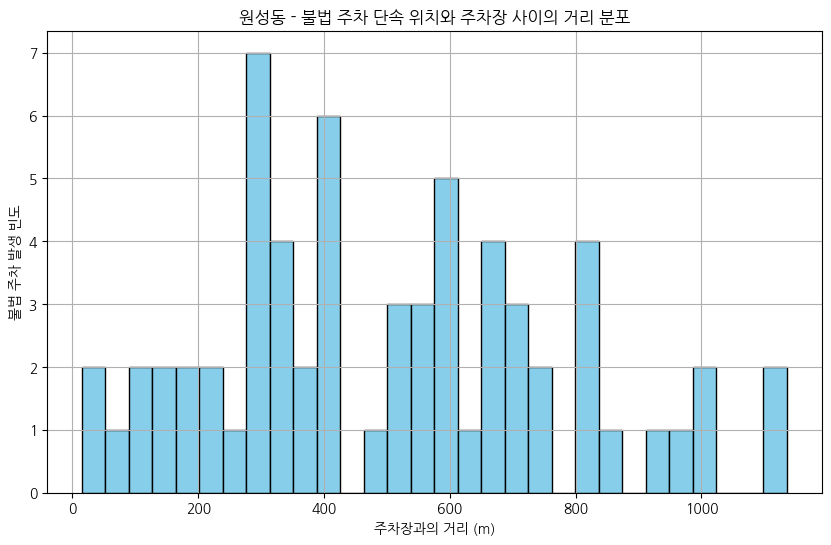

In [42]:
import folium
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 환경에서는 'NanumGothic'을 설치해야 합니다)
plt.rcParams['font.family'] = 'NanumGothic'

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.8091134, 'lon': 127.1581915, 'name': '버들로 제1노상주차장'},  
    {'lat': 36.81418927, 'lon': 127.162674, 'name': '성황로 제3노상주차장'},  
    {'lat': 36.81268831, 'lon': 127.1623341, 'name': '성황로 제2노상주차장'},  
    {'lat': 36.81187124, 'lon': 127.163016, 'name': '원성1동주민센터주차장'},  
    {'lat': 36.8091134, 'lon': 127.1535923, 'name': '중앙도서관주차장'}   
]

# 인코딩을 여러 방식으로 시도해 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/원성동 불법 주차 단속.csv'
encoding_list = ['utf-8', 'cp949', 'euc-kr']

for enc in encoding_list:
    try:
        violations_df = pd.read_csv(file_path, encoding=enc)
        print(f"파일을 성공적으로 읽었습니다. 사용된 인코딩: {enc}")
        break
    except UnicodeDecodeError:
        print(f"인코딩 {enc} 실패. 다음 인코딩 시도 중...")
else:
    raise ValueError("적합한 인코딩을 찾을 수 없습니다.")

# 각 불법 주차 단속 위치에서 가장 가까운 주차장과의 거리 계산
def find_closest_parking(lat, lon):
    min_distance = float('inf')
    for lot in parking_lots:
        distance = geodesic((lat, lon), (lot['lat'], lot['lon'])).meters
        if distance < min_distance:
            min_distance = distance
    return min_distance

# 거리 계산 후 새로운 열 추가
violations_df['주차장과의 거리 (m)'] = violations_df.apply(lambda row: find_closest_parking(row['위도'], row['경도']), axis=1)

# 히스토그램으로 거리와 불법 주차 빈도 시각화
plt.figure(figsize=(10, 6))
plt.hist(violations_df['주차장과의 거리 (m)'], bins=30, color='skyblue', edgecolor='black')
plt.title('원성동 - 불법 주차 단속 위치와 주차장 사이의 거리 분포')
plt.xlabel('주차장과의 거리 (m)')
plt.ylabel('불법 주차 발생 빈도')
plt.grid(True)
plt.show()


##### 성거읍

인코딩 utf-8 실패. 다음 인코딩 시도 중...
파일을 성공적으로 읽었습니다. 사용된 인코딩: cp949


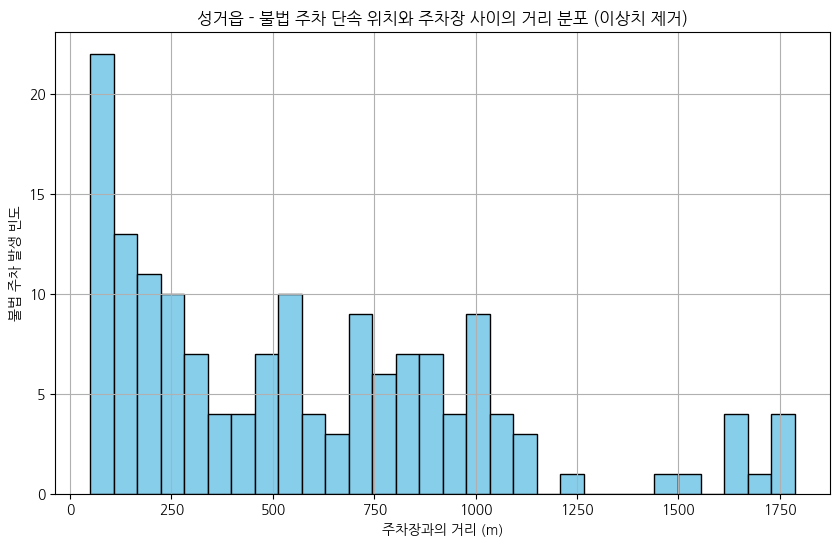

In [43]:
import folium
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 환경에서는 'NanumGothic'을 설치해야 합니다)
plt.rcParams['font.family'] = 'NanumGothic'

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.87162843, 'lon': 127.2010113, 'name': '성거도서관주차장'},
    {'lat': 36.87798796, 'lon': 127.1991297, 'name': '성거읍사무소주차장'},
    {'lat': 36.87871381, 'lon': 127.1559972, 'name': '서북구청 주차장'},
    {'lat': 36.872552, 'lon': 127.201385, 'name': '성거 제1공영주차장'},
    {'lat': 36.87410144, 'lon': 127.2013641, 'name': '성거 제2공영주차장'}
]

# 인코딩을 여러 방식으로 시도해 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성거읍 불법 주차 단속.csv'
encoding_list = ['utf-8', 'cp949', 'euc-kr']

for enc in encoding_list:
    try:
        violations_df = pd.read_csv(file_path, encoding=enc)
        print(f"파일을 성공적으로 읽었습니다. 사용된 인코딩: {enc}")
        break
    except UnicodeDecodeError:
        print(f"인코딩 {enc} 실패. 다음 인코딩 시도 중...")
else:
    raise ValueError("적합한 인코딩을 찾을 수 없습니다.")

# 각 불법 주차 단속 위치에서 가장 가까운 주차장과의 거리 계산
def find_closest_parking(lat, lon):
    min_distance = float('inf')
    for lot in parking_lots:
        distance = geodesic((lat, lon), (lot['lat'], lot['lon'])).meters
        if distance < min_distance:
            min_distance = distance
    return min_distance

# 거리 계산 후 새로운 열 추가
violations_df['주차장과의 거리 (m)'] = violations_df.apply(lambda row: find_closest_parking(row['위도'], row['경도']), axis=1)

# 1. 이상치 제거 후 히스토그램
filtered_data = violations_df[violations_df['주차장과의 거리 (m)'] < 2000]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['주차장과의 거리 (m)'], bins=30, color='skyblue', edgecolor='black')
plt.title('성거읍 - 불법 주차 단속 위치와 주차장 사이의 거리 분포 (이상치 제거)')
plt.xlabel('주차장과의 거리 (m)')
plt.ylabel('불법 주차 발생 빈도')
plt.grid(True)
plt.show()


##### 성환읍

인코딩 utf-8 실패. 다음 인코딩 시도 중...
파일을 성공적으로 읽었습니다. 사용된 인코딩: cp949


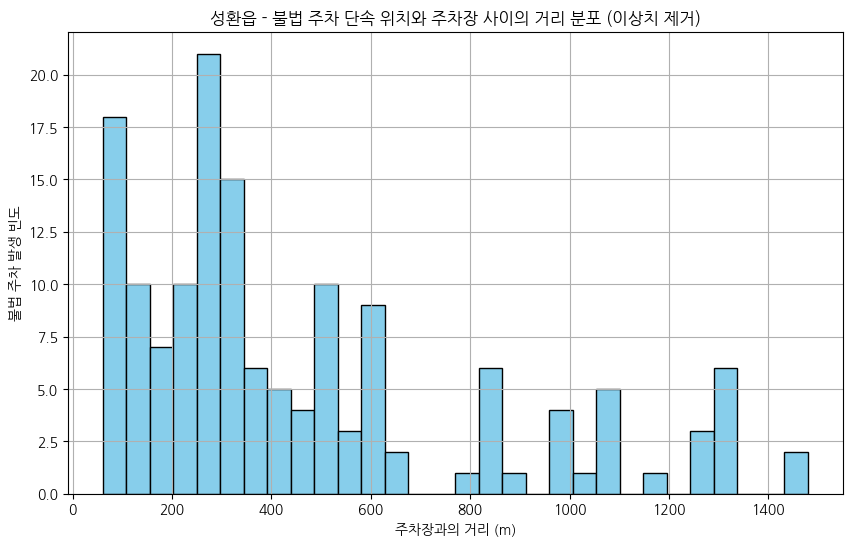

In [44]:
import folium
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 환경에서는 'NanumGothic'을 설치해야 합니다)
plt.rcParams['font.family'] = 'NanumGothic'

# 주차장 데이터 (위도, 경도, 이름)
parking_lots = [
    {'lat': 36.9181614, 'lon': 127.1343912, 'name': '성환읍사무소주차장'},  
    {'lat': 36.91647011, 'lon': 127.131189, 'name': '성환 제1공영주차장'},  
    {'lat': 36.91253596, 'lon': 127.1366796, 'name': '성환문화회관주차장'}
]

# 인코딩을 여러 방식으로 시도해 불법 주차 단속 데이터 로드
file_path = 'C:/Users/jisu/Documents/Ec/1/교통_주차/성환읍 불법 주차 단속.csv'
encoding_list = ['utf-8', 'cp949', 'euc-kr']

for enc in encoding_list:
    try:
        violations_df = pd.read_csv(file_path, encoding=enc)
        print(f"파일을 성공적으로 읽었습니다. 사용된 인코딩: {enc}")
        break
    except UnicodeDecodeError:
        print(f"인코딩 {enc} 실패. 다음 인코딩 시도 중...")
else:
    raise ValueError("적합한 인코딩을 찾을 수 없습니다.")

# 각 불법 주차 단속 위치에서 가장 가까운 주차장과의 거리 계산
def find_closest_parking(lat, lon):
    min_distance = float('inf')
    for lot in parking_lots:
        distance = geodesic((lat, lon), (lot['lat'], lot['lon'])).meters
        if distance < min_distance:
            min_distance = distance
    return min_distance

# 거리 계산 후 새로운 열 추가
violations_df['주차장과의 거리 (m)'] = violations_df.apply(lambda row: find_closest_parking(row['위도'], row['경도']), axis=1)

# 1. 이상치 제거 후 히스토그램
filtered_data = violations_df[violations_df['주차장과의 거리 (m)'] < 2000]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['주차장과의 거리 (m)'], bins=30, color='skyblue', edgecolor='black')
plt.title('성환읍 - 불법 주차 단속 위치와 주차장 사이의 거리 분포 (이상치 제거)')
plt.xlabel('주차장과의 거리 (m)')
plt.ylabel('불법 주차 발생 빈도')
plt.grid(True)
plt.show()


### 15. 법정동별 주차구획 수와 불법 주정차 단속 건수 간의 관계 상관 행렬

데이터 프레임의 첫 5행:
   법정동  주차장 수  단속 건수  주차구획수
0  병천면      6    613    296
1  원성동      5   2802    154
2  신부동      5  23309     87
3  목천읍      4   3380    634
4  봉명동      3   8989    133


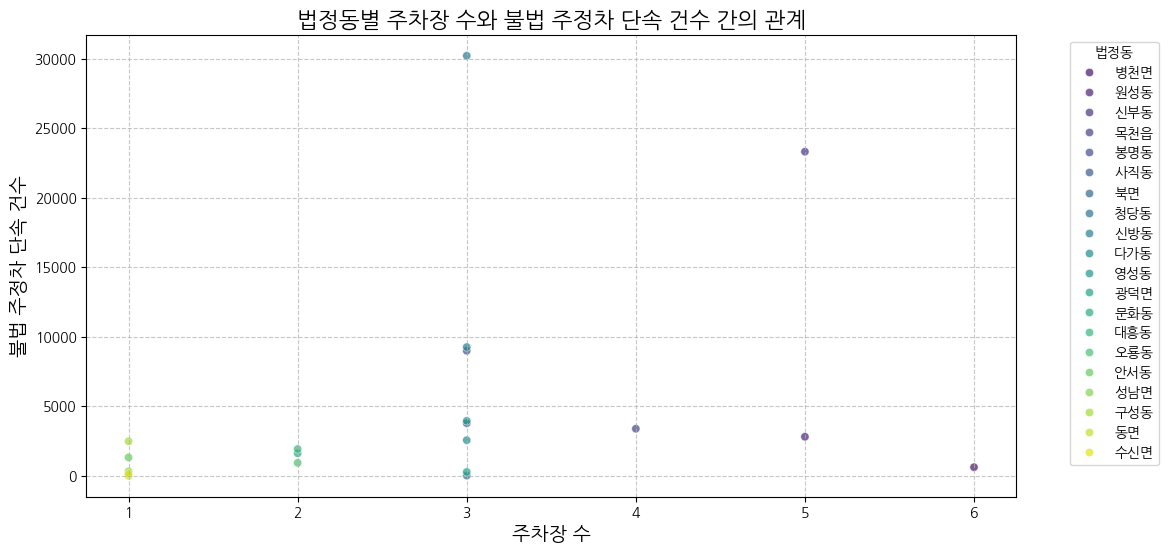

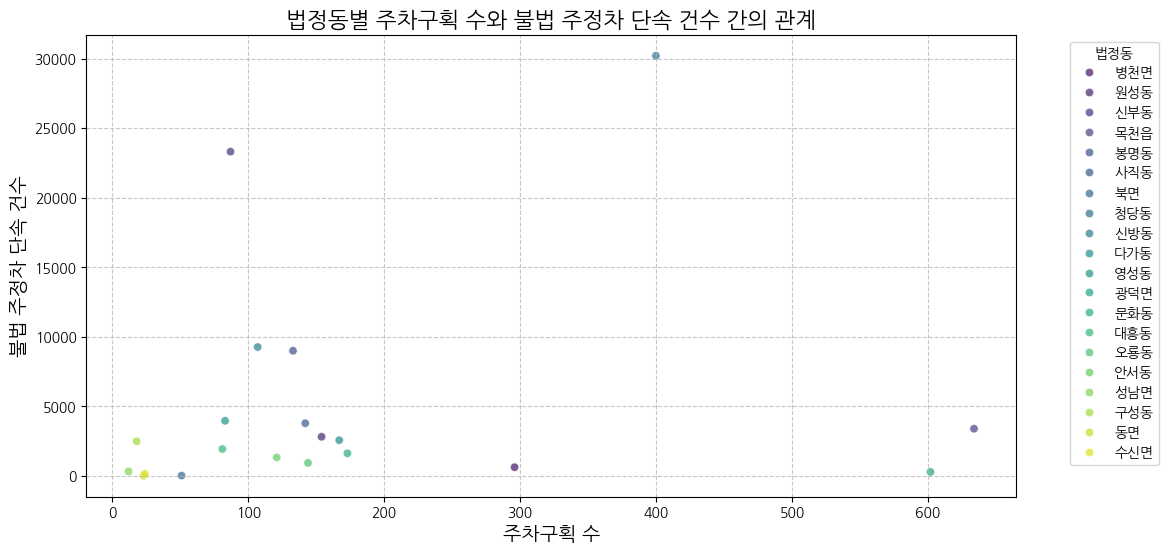

C:\Users\jisu\anaconda3\envs\jisu_py\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\jisu\anaconda3\envs\jisu_py\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


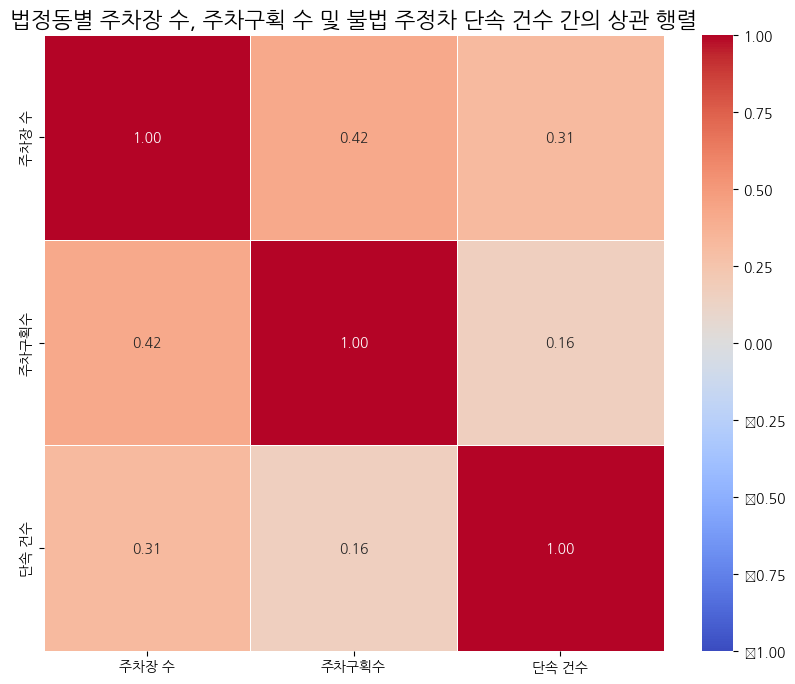

In [3]:
import pandas as pd

# 한글 폰트 설정 (Windows 환경에서는 'NanumGothic'을 설치해야 합니다)
plt.rcParams['font.family'] = 'NanumGothic'

# 파일 경로 설정 (현재 작업 디렉토리에 위치한 파일 경로로 변경)
file_path = r'C:/Users/jisu/Documents/Ec/1/교통_주차/천안시 동남구 주차장수 단속개수 법정동 주차구획수.csv'

# 데이터 로드
df = pd.read_csv(file_path)

# 데이터 확인
print("데이터 프레임의 첫 5행:")
print(df.head())
import matplotlib.pyplot as plt
import seaborn as sns

# 법정동별 주차장 수와 불법 주정차 단속 건수 간의 관계
plt.figure(figsize=(12, 6))
sns.scatterplot(x='주차장 수', y='단속 건수', hue='법정동', data=df, alpha=0.7, palette='viridis')
plt.title('법정동별 주차장 수와 불법 주정차 단속 건수 간의 관계', fontsize=16)
plt.xlabel('주차장 수', fontsize=14)
plt.ylabel('불법 주정차 단속 건수', fontsize=14)
plt.legend(title='법정동', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# 법정동별 주차구획 수와 불법 주정차 단속 건수 간의 관계
plt.figure(figsize=(12, 6))
sns.scatterplot(x='주차구획수', y='단속 건수', hue='법정동', data=df, alpha=0.7, palette='viridis')
plt.title('법정동별 주차구획 수와 불법 주정차 단속 건수 간의 관계', fontsize=16)
plt.xlabel('주차구획 수', fontsize=14)
plt.ylabel('불법 주정차 단속 건수', fontsize=14)
plt.legend(title='법정동', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# 법정동별 주차장 수, 주차구획 수, 불법 주정차 단속 건수 집계
heatmap_data = df.groupby('법정동').agg({
    '주차장 수': 'mean',    # 각 법정동의 평균 주차장 수
    '주차구획수': 'mean',  # 각 법정동의 평균 주차구획 수
    '단속 건수': 'mean'     # 각 법정동의 평균 단속 건수
}).reset_index()

# 상관 행렬 계산
corr_matrix = heatmap_data[['주차장 수', '주차구획수', '단속 건수']].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('법정동별 주차장 수, 주차구획 수 및 불법 주정차 단속 건수 간의 상관 행렬', fontsize=16)
plt.show()
